<a href="https://colab.research.google.com/github/paruliansaragi/Notebooks/blob/master/cs231n_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

http://cs231n.github.io/classification/ 

#Classification 


Problem: given an image how do we assign a class label? This may trivial for a human but here are some of the challenges posed:

- viewpoint invariance: an instance of an object/image may be oriented different with respect to the camera.
- scale variation: classes may vary in size
- Deformation
- Occlusion: only a small part of an object is visible, occluding the object in the image.
- illumination
- background clutter: blending the object into the backdrop
- intra-class variation: different types of the same class such as a chair 

"*A good image classification model must be invariant to the cross product of all these variations, while simultaneously retaining sensitivity to the inter-class variations*."

Pipeline: input of N images and K classes. Learning: what the classes are. Evaluation: of the classifier by predicting labels on unseen data but i.i.d. 

The Nearest Neighbour takes a test image and compares it to every single training image and predicts the labels based on the label of the closest training label.

How do we compare? One simple method is by comparing images pixel by pixel and adding up the differences. This is formalized as the L1 distance:

$d_1(Image1, Image2) = \sum{p} |Image^p_1 - Image^p_2|$

We take the sum over all the pixels. ![alt text](http://cs231n.github.io/assets/nneg.jpeg)





```
x_train = x_train.reshape(x_train.shape[0], 32 * 32 * 3)# reshape into batch size by rows of the pixels so 50,000 x 3072
x_test = x_test.reshape(x_test.shape[0], 32 * 32 * 3)#reshape into 10,000 x 3072

nn = NearestNeighbour()
nn.train(x_train, y_train)
y_test_predict = nn.predict(x_test)
print(np.mean(y_test_predict == y_test))#print the average over all are right predictions

in the predict function of nn class
num_test = X.shape[0]
for i in range(num_test):
#find the nearest image to the i'th test image, via the sum of the absolute values
dist = np.sum(np.abs(X_train - X[i, :]), axis=1) # X[i,:]means fetch the pixels of the i'th row and axis=1 means the columns of, so we do the absolute value difference of the columns i.e. the pixel values of the i'th example.
small_dist_idx = np.argmin(dist)#fetches the index of the smallest value i.e. smallest dist
y_prediction_ith = y_test[small_dist_idx]
```

This achieves around 38% which is > random < human & CNN's.
How about L2 distance? This is the same as the above apart from we square root the sum and the differences are squared.

$d_1(Image1, Image2) = \sqrt \sum{p} |Image^p_1 - Image^p_2| \squared$

```
#replace dist
dist = np.sqrt ( np.sum ( X_train - X[i,:])**2, axis=1)
```

L2 is far more unforgiving in large differences between vectors

Setting k=1 is unintuitive, if we have a higher k this creates smoother decision boundaries and is far more forgiving to outliers.

![alt text](http://cs231n.github.io/assets/knn.jpeg)

Finding the best value for k requires a validation dataset so we can tune our hyperparameters. We don't tune with the test set as we might start to overfit to this dataset we ideally never touch this set until test time. Instead we use a slightly smaller part of the training data set. 

If you don't have a dataset large enough for a validation set we sometimes use cross-validation. Instead of partitioning say 20% for a validation set and the rest training, we can get less noise and a better estimate by seeing what values of k work on different validation sets and averaging over the results. If we used 10 fold cross validation we may split the training data into 8 folds and use 2 for validation. We then iterate over which is the validation fold, evaluate, and average over the different folds.

Pro's of KNN: easy to understand, easy to train since we only store the training images and indexes. 

Con's of KNN: have to compare test image against every image in training data at test time. We prefer our models to be faster at test time than training. 

If we use t-SNE we can compare pixelwise difference, and this shows that images that are similar are more a function of general colour distribution or type of background rather than semantic identity. 

To do this in practice:

Normalize pixels in the image to have zero mean and unit variance. If pixels are homogenous and dont have large different distributions then this may not be necessary.

Reduce dimensions using say PCA, if necessary.

Split into train/test/validation.

Train and evaluate KNN and keep track of the accuracies for the best k.



In [0]:
!unzip ./spring1819_assignment1.zip

Archive:  ./spring1819_assignment1.zip
   creating: assignment1/
  inflating: assignment1/.gitignore  
  inflating: assignment1/collectSubmission.sh  
   creating: assignment1/cs231n/
   creating: assignment1/cs231n/classifiers/
  inflating: assignment1/cs231n/classifiers/k_nearest_neighbor.py  
  inflating: assignment1/cs231n/classifiers/linear_classifier.py  
  inflating: assignment1/cs231n/classifiers/linear_svm.py  
  inflating: assignment1/cs231n/classifiers/neural_net.py  
  inflating: assignment1/cs231n/classifiers/softmax.py  
  inflating: assignment1/cs231n/classifiers/__init__.py  
   creating: assignment1/cs231n/datasets/
  inflating: assignment1/cs231n/datasets/.gitignore  
  inflating: assignment1/cs231n/datasets/get_datasets.sh  
  inflating: assignment1/cs231n/data_utils.py  
  inflating: assignment1/cs231n/features.py  
  inflating: assignment1/cs231n/gradient_check.py  
  inflating: assignment1/cs231n/vis_utils.py  
 extracting: assignment1/cs231n/__init__.py  
  infla

In [0]:
%cd assignment1/cs231n/datasets
!./get_datasets.sh

/content/assignment1/cs231n/datasets
--2019-05-17 12:49:53--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  9.66MB/s    in 16s     

2019-05-17 12:50:09 (10.2 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [0]:
%cd ../../

/content/assignment1


In [0]:
!ls

collectSubmission.sh  knn.ipynb		start_ipython_osx.sh
cs231n		      README.md		svm.ipynb
features.ipynb	      requirements.txt	two_layer_net.ipynb
frameworkpython       softmax.ipynb


###KNN classifier

2 steps:
- during training, take the training data and remember it
- during test, classify every test image by comparing it to all training image and label it as the k most similar training example
- cross-validate the value of k



In [0]:
# Run some setup code for this notebook.

import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [0]:
# Load the raw CIFAR-10 data.
cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


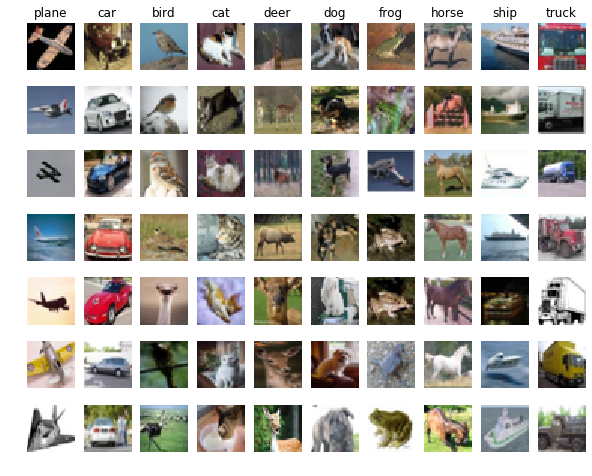

In [0]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [0]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


- 1. first compute the distances between all test and all train examples
- 2. Given these distances, for each test example we kind the k nearest examples and have them vote for the label

Lets compute the distances, if N_train and N_test we will output a N_train x N_train matrix where each element (i, j) is the distance between the i-th test and j-th train. 

In [0]:
from builtins import range
from builtins import object
import numpy as np
from past.builtins import xrange


class KNN(object):
    """ a kNN classifier with L2 distance """

    def __init__(self):
        pass

    def train(self, X, y):
        """
        Train the classifier. For k-nearest neighbors this is just
        memorizing the training data.

        Inputs:
        - X: A numpy array of shape (num_train, D) containing the training data
          consisting of num_train samples each of dimension D.
        - y: A numpy array of shape (N,) containing the training labels, where
             y[i] is the label for X[i].
        """
        self.X_train = X
        self.y_train = y

    def predict(self, X, k=1, num_loops=0):
        """
        Predict labels for test data using this classifier.

        Inputs:
        - X: A numpy array of shape (num_test, D) containing test data consisting
             of num_test samples each of dimension D.
        - k: The number of nearest neighbors that vote for the predicted labels.
        - num_loops: Determines which implementation to use to compute distances
          between training points and testing points.

        Returns:
        - y: A numpy array of shape (num_test,) containing predicted labels for the
          test data, where y[i] is the predicted label for the test point X[i].
        """
        if num_loops == 0:
            dists = self.compute_distances_no_loops(X)
        elif num_loops == 1:
            dists = self.compute_distances_one_loop(X)
        elif num_loops == 2:
            dists = self.compute_distances_two_loops(X)
        else:
            raise ValueError('Invalid value %d for num_loops' % num_loops)

        return self.predict_labels(dists, k=k)

    def compute_distances_two_loops(self, X):
        """
        Compute the distance between each test point in X and each training point
        in self.X_train using a nested loop over both the training data and the
        test data.

        Inputs:
        - X: A numpy array of shape (num_test, D) containing test data.

        Returns:
        - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
          is the Euclidean distance between the ith test point and the jth training
          point.
        """
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
            for j in range(num_train):
                #####################################################################
                # TODO:                                                             #
                # Compute the l2 distance between the ith test point and the jth    #
                # training point, and store the result in dists[i, j]. You should   #
                # not use a loop over dimension, nor use np.linalg.norm().          #
                #####################################################################
                # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
                dists[i][j] = np.sqrt(np.sum((X[i] - self.X_train[j])**2))
                #dists[i][j] = np.sqrt(np.sum((X[i] - self.X_train[j])**2))

                #pass

                # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return dists

    def compute_distances_one_loop(self, X):
        """
        Compute the distance between each test point in X and each training point
        in self.X_train using a single loop over the test data.

        Input / Output: Same as compute_distances_two_loops
        """
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
            #######################################################################
            # TODO:                                                               #
            # Compute the l2 distance between the ith test point and all training #
            # points, and store the result in dists[i, :].                        #
            # Do not use np.linalg.norm().                                        #
            #######################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            #for the ith training example 
            #store the distance between the test and train image for each pixel in the array
            dists[i, :] = np.sqrt ( np.sum ( np.square(X[i,:] - self.X_train), axis=1 ))
            

            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return dists

    def compute_distances_no_loops(self, X):
        """
        Compute the distance between each test point in X and each training point
        in self.X_train using no explicit loops.

        Input / Output: Same as compute_distances_two_loops
        """
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        #########################################################################
        # TODO:                                                                 #
        # Compute the l2 distance between all test points and all training      #
        # points without using any explicit loops, and store the result in      #
        # dists.                                                                #
        #                                                                       #
        # You should implement this function using only basic array operations; #
        # in particular you should not use functions from scipy,                #
        # nor use np.linalg.norm().                                             #
        #                                                                       #
        # HINT: Try to formulate the l2 distance using matrix multiplication    #
        #       and two broadcast sums.                                         #
        #########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        X[:,:]#all test images
        self.X_train[:,:]#all train images
        #This is because we want to find the length of the 
        #line that connects the two vectors i.e. the difference between them
        #that difference squares expands into: (x - y)2 = x2 + y2 - 2xy 
        #if we decompose this we do -2* x . y + the sum of squared x's + squared y's
        x2 = np.sum(X**2, axis=-1)
        y2 = np.sum(self.X_train**2, axis=-1)
        xdoty = np.dot(X, self.X_train.T)
        
        dists = np.sqrt( x2.reshape(-1, 1) - 2 * xdoty + y2 )
        #dists = -2 * np.dot(X, self.X_train.T) + np.sum(self.X_train**2, axis=1) + np.sum(X**2)[:, np.newaxis]

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return dists

    def predict_labels(self, dists, k=1):
        """
        Given a matrix of distances between test points and training points,
        predict a label for each test point.

        Inputs:
        - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
          gives the distance betwen the ith test point and the jth training point.

        Returns:
        - y: A numpy array of shape (num_test,) containing predicted labels for the
          test data, where y[i] is the predicted label for the test point X[i].
        """
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            # A list of length k storing the labels of the k nearest neighbors to
            # the ith test point.
            closest_y = []
            #########################################################################
            # TODO:                                                                 #
            # Use the distance matrix to find the k nearest neighbors of the ith    #
            # testing point, and use self.y_train to find the labels of these       #
            # neighbors. Store these labels in closest_y.                           #
            # Hint: Look up the function numpy.argsort.                             #
            #########################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

            closest_y = np.array(self.y_train[np.argsort(dists[i,:], axis=0)[:k]])

            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            #########################################################################
            # TODO:                                                                 #
            # Now that you have found the labels of the k nearest neighbors, you    #
            # need to find the most common label in the list closest_y of labels.   #
            # Store this label in y_pred[i]. Break ties by choosing the smaller     #
            # label.                                                                #
            #########################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

            y_pred[i] = np.bincount(closest_y).argmax()

            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        return y_pred


####Reminder of axes

![alt text](https://i.stack.imgur.com/dcoE3.jpg)

 the newaxis is used to increase the dimension of the existing array by one more dimension, when used once.
 
 ![alt text](https://i.stack.imgur.com/zkMBy.png)

In [0]:
#from cs231n.classifiers import KNearestNeighbor

# Create a kNN classifier instance. 
# Remember that training a kNN classifier is a noop: 
# the Classifier simply remembers the data and does no further processing 
classifier = KNN()
classifier.train(X_train, y_train)

In [0]:
classifier

In [0]:
# Open cs231n/classifiers/k_nearest_neighbor.py and implement
# compute_distances_two_loops.

# Test your implementation:
dists = classifier.compute_distances_two_loops(X_test)
print(dists.shape)

(500, 5000)


In [0]:
dists

array([[3803.92350081, 4210.59603857, 5504.0544147 , ..., 4007.64756434,
        4203.28086142, 4354.20256764],
       [6336.83367306, 5270.28006846, 4040.63608854, ..., 4829.15334194,
        4694.09767687, 7768.33347636],
       [5224.83913628, 4250.64289255, 3773.94581307, ..., 3766.81549853,
        4464.99921613, 6353.57190878],
       ...,
       [5366.93534524, 5062.8772452 , 6361.85774755, ..., 5126.56824786,
        4537.30613911, 5920.94156364],
       [3671.92919322, 3858.60765044, 4846.88157479, ..., 3521.04515734,
        3182.3673578 , 4448.65305458],
       [6960.92443573, 6083.71366848, 6338.13442584, ..., 6083.55504619,
        4128.24744898, 8041.05223214]])

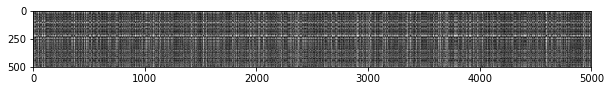

In [0]:
# We can visualize the distance matrix: each row is a single test example and
# its distances to training examples
plt.imshow(dists, interpolation='none')
plt.show()

#### Q1  Notice the structured patterns in the distance matrix, where some rows or columns are visible brighter. 
NB: Black indicates low distances while white indicates high distances. 

- What in the data is the cause behind the distinctly bright rows?

When comparing the distance between test image and train image, the bright rows are when we compare a low intensity value with a high intensity value causing a large distance or vice versa. 

So a bright row indicates a test image which is significantly different from most of the training images. A bright column indicates a training image that is significantly different from most of the test images.

- What causes the columns? 

Well the same applies for the columns. Each element of the matrix is the distance between i-th test and j-th train example. So the j-th train column is bright where the distance is great to the i-th row that being the test example.


In [0]:
# Now implement the function predict_labels and run the code below:
# We use k = 1 (which is Nearest Neighbor).
y_test_pred = classifier.predict_labels(dists, k=1)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 57 / 500 correct => accuracy: 0.114000


In [0]:
y_test_pred = classifier.predict_labels(dists, k=5)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 57 / 500 correct => accuracy: 0.114000


####Q 2 We can also use other distance metrics such as L1 distance. The performance of NN classifier that uses L1 will not change if (select all that apply):

1. The data is preprocessed by subtracting the mean.

Subtracting the mean will normalize the data near the origin and therefore it wont distort the range of values that greatly. 

In [0]:
X_train[0].astype('uint8') - np.mean(X_train[0].astype('uint8')), X_train[0].astype('uint8')

(array([-44.44726562, -41.44726562, -40.44726562, ...,  19.55273438,
        -11.44726562, -31.44726562]),
 array([ 59,  62,  63, ..., 123,  92,  72], dtype=uint8))

- 2. The data is preprocessed by subtracting the mean and dividing by the standard deviation.

Subtracting the mean and dividing by the standard deviation is the same as standardizing the data, i.e., a type of normalization known as z-score in which the data has mean of 0 and standard deviation of 1. This helps scale the data with vastly different ranges. Since the range of our pixels are 0-255, the difference between L1 and L2 won't be great since this preprocessing step does not change the results greatly. If the ranges were vastly different this may have an effect. Since L1 norm is the sum of the absolute values of a vector. 

The L2 norm is the euclidean distance from the origin and is just the square root of the sum of the squared values of a vector. Both L1 and L2 are sensitive to large ranges of values.

Please see below.

In [0]:
np.mean(X_train[0].astype('uint8')) // np.std(X_train[0].astype('uint8')) , X_train[0].astype('uint8')

(1.0, array([ 59,  62,  63, ..., 123,  92,  72], dtype=uint8))

In [0]:
np.ptp(X_train[0].astype('uint8'))

255

In [0]:
from numpy import array
from numpy.linalg import norm
a = array([1, 2, 3])
print(a)
l1 = norm(a, 1)
print(l1)

[1 2 3]
6.0


In [0]:
a = array([1000, 24645, 31])
print(a)
l1 = norm(a, 1)
print(l1)

[ 1000 24645    31]
25676.0


In [0]:
a = array([1, 2, 3])
l2 = np.sqrt( np.power(a[0], 2) + np.power(a[1], 2) + np.power(a[2], 2) )
l2

3.7416573867739413

In [0]:
a = array([1000, 24645, 31])
l2 = np.sqrt( np.power(a[0], 2) + np.power(a[1], 2) + np.power(a[2], 2) )
l2

24665.29922786261

- 3. The coordinate axes for the data are rotated.

The rotation of the axes does not change the range of values so this won't affect the distances.

So the answer to question 2 is none of the above.

In [0]:
# Now lets speed up distance matrix computation by using partial vectorization
# with one loop. Implement the function compute_distances_one_loop and run the
# code below:
classifier = KNN()
classifier.train(X_train, y_train)
dists_one = classifier.compute_distances_one_loop(X_test)

# To ensure that our vectorized implementation is correct, we make sure that it
# agrees with the naive implementation. There are many ways to decide whether
# two matrices are similar; one of the simplest is the Frobenius norm. In case
# you haven't seen it before, the Frobenius norm of two matrices is the square
# root of the squared sum of differences of all elements; in other words, reshape
# the matrices into vectors and compute the Euclidean distance between them.
difference = np.linalg.norm(dists - dists_one, ord='fro')
print('Difference was: %f' % (difference, ))
if difference < 0.001:
    print('Good! The distance matrices are the same')
else:
    print('Uh-oh! The distance matrices are different')

Difference was: 0.000000
Good! The distance matrices are the same


In [0]:

# Now implement the fully vectorized version inside compute_distances_no_loops
# and run the code
classifier = KNN()
classifier.train(X_train, y_train)
dists_two = classifier.compute_distances_no_loops(X_test)

# check that the distance matrix agrees with the one we computed before:
difference = np.linalg.norm(dists - dists_two, ord='fro')
print('Difference was: %f' % (difference, ))
if difference < 0.001:
    print('Good! The distance matrices are the same')
else:
    print('Uh-oh! The distance matrices are different')

Difference was: 0.000000
Good! The distance matrices are the same


In [0]:
classifier = KNN()

In [0]:
# Let's compare how fast the implementations are
def time_function(f, *args):
    """
    Call a function f with args and return the time (in seconds) that it took to execute.
    """
    import time
    tic = time.time()
    f(*args)
    toc = time.time()
    return toc - tic

two_loop_time = time_function(classifier.compute_distances_two_loops, X_test)
print('Two loop version took %f seconds' % two_loop_time)

one_loop_time = time_function(classifier.compute_distances_one_loop, X_test)
print('One loop version took %f seconds' % one_loop_time)

no_loop_time = time_function(classifier.compute_distances_no_loops, X_test)
print('No loop version took %f seconds' % no_loop_time)

# you should see significantly faster performance with the fully vectorized implementation

Two loop version took 36.307405 seconds
One loop version took 53.252259 seconds
No loop version took 0.626260 seconds


We have implemented the k-Nearest Neighbor classifier but we set the value k = 5 arbitrarily. We will now determine the best value of this hyperparameter with cross-validation.

In [0]:
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

X_train_folds = []
y_train_folds = []
################################################################################
# TODO:                                                                        #
# Split up the training data into folds. After splitting, X_train_folds and    #
# y_train_folds should each be lists of length num_folds, where                #
# y_train_folds[i] is the label vector for the points in X_train_folds[i].     #
# Hint: Look up the numpy array_split function.                                #
################################################################################
#array, indices_or_sections, axis=0
X_train_folds = np.array_split(X_train, num_folds)
y_train_folds = np.array_split(y_train, num_folds)

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

# A dictionary holding the accuracies for different values of k that we find
# when running cross-validation. After running cross-validation,
# k_to_accuracies[k] should be a list of length num_folds giving the different
# accuracy values that we found when using that value of k.
k_to_accuracies = {}



In [0]:
num_cross_test = np.shape(X_train_folds)[1]

for k in k_choices:
    k_to_accuracies_list = []
    for i in range(num_folds):
        X_cross_train = [X_train_folds[j] for j in range(num_folds) if j != i]
        y_cross_train = [y_train_folds[j] for j in range(num_folds) if j != i]
        X_cross_train = np.reshape(X_cross_train, (-1, X_train.shape[1]))
        y_cross_train = np.reshape(y_cross_train, (-1))

In [0]:
combinat

[0, 1, 2, 3]

In [0]:
k_to_accuracies[k] = []
for i in range(5):
  xs = 

In [0]:
################################################################################
# TODO:                                                                        #
# Perform k-fold cross validation to find the best value of k. For each        #
# possible value of k, run the k-nearest-neighbor algorithm num_folds times,   #
# where in each case you use all but one of the folds as training data and the #
# last fold as a validation set. Store the accuracies for all fold and all     #
# values of k in the k_to_accuracies dictionary.                               #
################################################################################
# we basically want to create 5 folds for each training fold
# and stack rows np.vstack Stack arrays in sequence vertically (row wise).
num_cross_test = np.shape(X_train_folds)[1]

for k in k_choices:
    k_to_accuracies_list = []
    for i in range(num_folds):
        X_cross_train = [X_train_folds[j] for j in range(num_folds) if j != i]
        y_cross_train = [y_train_folds[j] for j in range(num_folds) if j != i]
        X_cross_train = np.reshape(X_cross_train, (-1, X_train.shape[1]))
        y_cross_train = np.reshape(y_cross_train, (-1))


        classifier_cross = KNN()
        classifier_cross.train(X_cross_train, y_cross_train)
        dists_cross = classifier_cross.compute_distances_no_loops(X_train_folds[i])
        y_cross_test_pred = classifier_cross.predict_labels(dists_cross, k = k)

        num_correct = np.sum(y_cross_test_pred == y_train_folds[i])
        accuracy = float(num_correct) / num_cross_test
        k_to_accuracies_list.append(accuracy)

    k_to_accuracies[k] = k_to_accuracies_list
  
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

# Print out the computed accuracies
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))

k = 1, accuracy = 0.263000
k = 1, accuracy = 0.257000
k = 1, accuracy = 0.264000
k = 1, accuracy = 0.278000
k = 1, accuracy = 0.266000
k = 3, accuracy = 0.239000
k = 3, accuracy = 0.249000
k = 3, accuracy = 0.240000
k = 3, accuracy = 0.266000
k = 3, accuracy = 0.254000
k = 5, accuracy = 0.248000
k = 5, accuracy = 0.266000
k = 5, accuracy = 0.280000
k = 5, accuracy = 0.292000
k = 5, accuracy = 0.280000
k = 8, accuracy = 0.262000
k = 8, accuracy = 0.282000
k = 8, accuracy = 0.273000
k = 8, accuracy = 0.290000
k = 8, accuracy = 0.273000
k = 10, accuracy = 0.265000
k = 10, accuracy = 0.296000
k = 10, accuracy = 0.276000
k = 10, accuracy = 0.284000
k = 10, accuracy = 0.280000
k = 12, accuracy = 0.260000
k = 12, accuracy = 0.295000
k = 12, accuracy = 0.279000
k = 12, accuracy = 0.283000
k = 12, accuracy = 0.280000
k = 15, accuracy = 0.252000
k = 15, accuracy = 0.289000
k = 15, accuracy = 0.278000
k = 15, accuracy = 0.282000
k = 15, accuracy = 0.274000
k = 20, accuracy = 0.270000
k = 20, accu

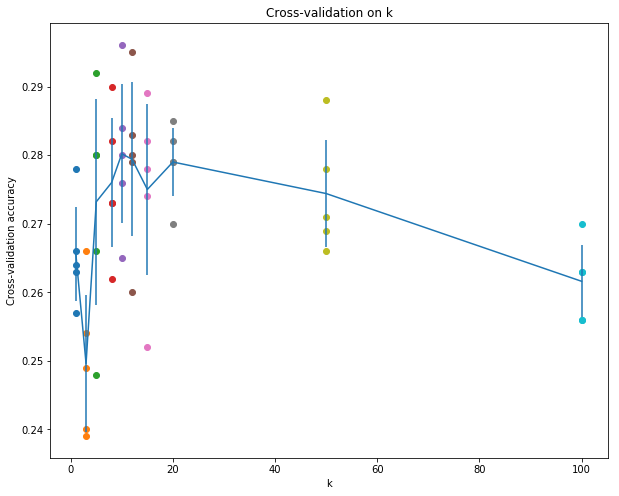

In [0]:
# plot the raw observations
for k in k_choices:
  accuracies = k_to_accuracies[k]
  plt.scatter([k] * len(accuracies), accuracies)

# plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [0]:
# Based on the cross-validation results above, choose the best value for k,   
# retrain the classifier using all the training data, and test it on the test
# data. You should be able to get above 28% accuracy on the test data.
best_k = 10

classifier = KNN()
classifier.train(X_train, y_train)
y_test_pred = classifier.predict(X_test, k=best_k)

# Compute and display the accuracy
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print ('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 141 / 500 correct => accuracy: 0.282000


####Q3 Which statements about KKn are true in classification and for all k?

- 1. The training error of a 1-NN will always be better than that of 5-NN. True, because for each training example its nearest neighbour will always be itself so the error of 1-NN is 0.

- 2. The test error of 1-NN always better than 5-NN. False, see the cross validation above, it depends on the setting.

- 3. The decision boundary of the k-NN classifier is linear. False the decision boundary of a 1-NN is just every segment of a Voronoi diagram combined.  With k different points we get a non-linear combination of decision boundaries.

Voronoi Tesselations: Each boundary partitions off a space for which a point is near. So it is a partitioning of a plane into regions based on distance to points in a specific subset of the plane. 

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/5/54/Euclidean_Voronoi_diagram.svg/330px-Euclidean_Voronoi_diagram.svg.png)

- 4. The time needed to classify a test example with the k-NN classifier grows with the size of the training set. True, as the training size increases the number of comparisons between test example and all training examples grows large.

The classifier must remember all of the training data and store it for future comparisons with the test data. This is space inefficient because datasets may easily be gigabytes in size.

Classifying a test image is expensive since it requires a comparison to all training images.

http://cs231n.github.io/linear-classify/

#Linear Classifier

A linear function that maps images to label score by learning some weights. Firstly, lets define a score function that maps pixel values to confidence scores of classes. We have images of D dimensions (32*32*3=3072), K classes and N examples. We a need a function that maps from D => K.

A linear mapping:

$f(x_i, W, b) = Wx_i + b$

We assume $x_i$ is an image with all of its pixels flatten so Dx1, the Weight matrix $W$ is K x D and vector $b$ is K x 1. In this example, $x_i$ contains all the pixels in an i-th image flattened into [3072 x 1] column, W is [10 x 3072] and b is [10 x 1]. So 3072 numbers go into the function and it outputs 10 class labels. 

NB: the matrix multiplication $Wx_i$ is evaluating 10 separate classifiers in parallel, one for each class, where each classifier is a row of $W$. We learn the best parameters W and b to produce the correst classes. Once training is over we keep these learned parameters and use them to test the generalisability of our linear mapping. Classifying at test time is faster than KNN since we do a single matrix multiplication and addition. 

A linear classifier computes the score of a class as a weighted sum of all of its pixel values across 3 channels. ![alt text](http://cs231n.github.io/assets/imagemap.jpg)

"*An example of mapping an image to class scores. For the sake of visualization, we assume the image only has 4 pixels (4 monochrome pixels, we are not considering color channels in this example for brevity), and that we have 3 classes (red (cat), green (dog), blue (ship) class). (Clarification: in particular, the colors here simply indicate 3 classes and are not related to the RGB channels.) We stretch the image pixels into a column and perform matrix multiplication to get the scores for each class. Note that this particular set of weights W is not good at all: the weights assign our cat image a very low cat score. In particular, this set of weights seems convinced that it's looking at a dog.*"

"*Analogy of images as high-dimensional points. Since the images are stretched into high-dimensional column vectors, we can interpret each image as a single point in space. Since we defined each class as a weighted sum of all image pixels, each class is a linear function over this space*."

![alt text](http://cs231n.github.io/assets/pixelspace.jpeg)

Each row is a classifier as we see above, if we change one row of W the same line above would rotate in a different direction depending on how we change the row. The biases allow the classifier to translate the lines. Without the bias term, if $x_i$ = 0 then all the scores would be 0 irrespective of the weights so all the lines would cross the origin. 

Linear classifiers as template matching:

Another way to see this is that each row of W corresponds to a different template for one class. The score is then done by taking the inner (dot) product of each template with an image to find the best fit. The linear classifier is doing learned template matching. This is akin to NN, but instead of thousands of training images we only use a single image per class (but does not have to be an image in the training set) and we use the negative inner product as distance instead of L1/L2. 

![alt text](http://cs231n.github.io/assets/templates.jpg)

The linear classifier seems too weak to account for different coloured cars but a neural network is able to develop intermediate neurons in its hidden layers that can detect specific car types, and neurons in the next layer can combine these into more accurate car scores through a weighted sum of the individual car detectors. 

Bias trick: We append the bias vector onto the weight matrix. This is the same as adding a bias dimension with a constant 1 to all input vectors and extending the weight matrix by 1 column. 

We need to center the data by subtracting the mean from every feature. This is equivalent to computing the mean across training images and subtracting it from every image. 

####Loss Function

#####Multiclass SVMs

Multiclass SVM loss. SVM loss wants the correct class to have a score higher than incorrect classes by some fixed margin $\Delta$. 

For the i-th example we have a pixels of image $x_i$ and label $y_i$, the score computes a vector of class scores $s$, e.g. the score for the j-th class is the j-th element $s_j = f(x_i, W)_j$. The multiclass SVM loss for the i-th example is then: 

$$\sum_{j \neq y_i} max(), s_j - s_{y_i}+ \Delta )$$

Lets unpack: We have 3 classes that receive scores $s$ = [13, -7, 11], the first class is the correct class $y_i=0$. Assume $\Delta$ hyperparameter is 10. The above expression sums over all incorrect classes $j \neq y_i$ so we get 2 terms: 

$$L_i=max(0, -7 - 13 + 10) + max(0, 11 - 13 + 10)$$

The first term gives you 0 since -7- 13 + 10 gives a negative which we throw away with the $max(0, -)$ function. We get 0 loss for this pair because the correct class score 13 was greater than the incorrect class score -7 by atleast a margin of 10. In fact the difference was 20 but the SVM only cares that the difference is atleast 10, any additional difference above the margin is clamped at 0 with max. The second term 11-13+10 gives 8, even though the right class had a higher score than incorrect 13 > 11, it wasn't above the margin. The difference was 2, so the loss is 8 (i.e. how much high the difference needs to be to meet the margin). 

Thus, the SVM loss wants the score of the correct class $y_i$ to be larger than the incorrect class by at least $\Delta$. 

The threshold at 0 $max(0, -)$ is called the hinge loss. The squared hinge loss is the same but penalizes quadratically $max(0, -)^2$.

![alt text](http://cs231n.github.io/assets/margin.jpg)

Scores of red or higher will be accumulated loss. 

**Regularisation** There is 1 bug with the loss function. Suppose we have the perfect W so all scores meet the margins. W may not be unique and there might be many W that correctly classify examples. If some W correctly classify all examples (so 0 loss for each example), then any multiple of these parameters $\lambda W$ where $\lambda > 1$ will also give zero loss because this transformation uniformly stretches all score magnitudes and their absolute differences. If the difference in scores between a correct class and nearest incorrect was 15, then multiplying all elements of W by 2 would make the new difference 30. We want to encode a preference for a certain set of weights W over others. 

We extend the loss with a regularisation penalty $R(W)$. L2 norm is the most common, discouraging large weights through elementwise quadratic penalty over all parameters. 

$$R(W) = \sum_{k} \sum_{l} W^2_{k,l}$$

We sum up all the squared elements of $W$. The SVM loss is comprised of the data loss (average loss $L_i$ over all examples) and regularisation loss. Regularisation improves generalisation as we penalize large weights no input dimension can have a large influence on the scores by itself. E.g. suppose we have an input vector $x=[1,1,1,1]$ and 2 weight vectors $w_1 = [1,0,0,0], w_2 = [0.25, 0.25, 0.25, 0.25]$. Then $W^T_1 x = W^T_2 x = 1$ so both weight vectors have the same dot product but the L2 penalty for w1 is 1.0 and 0.25 for w2. So we prefer w2. This is because the weights are smaller and have smaller spread.  

This forces the classifier to take into account all input dimensions to small amounts instead of a few strong input dimensions. The biases dont control the strength of influence of an input dimension so we dont regularise them. Because of regularisation we don't achieve a loss of 0.0 on all examples, this is only possible if W=0. 

```
delta = 1.0
scores = W.dot(x)
correct_class_scores = scores[y] #index scores with y
num_classes = W.shape[0] # W = K x N
loss_i = 0.0
for j in range(D):
if j == y:
continue
loss_i += max(0, scores[j] - correct_class_score + delta)

#vectorised
delta = 1.0
scores = W.dot(x)
margins = np.maximum(0, scores - scores[y] + delta)
margins[y] = 0 # on y-th position scores[y]-scores[y] cancelled and gave delta we want to ignore the y-th position and only consider margin on max wrong class
loss_i = np.sum(margins)

```

How to set delta? We can safely set delta to 1.0 in all cases. The hyperparameters $\Delta , \lambda $ control the same tradeoff: tradeoff between data loss and regularisation loss in the objective. The magnitude of the weights W has direct effect on the scores (and their differences): as we shrink all values in W the scores differences become smaller, as we scale up the weights the score differences become higher. Thus, the exact value of the margin say $\Delta$ = 1 or 100 are meaningless because the weights can shrink and stretch the differences arbitrarily. Hence the only real tradeoff is how large we allow the weights to grow through the regularisation strength. 

####Softmax Classifier

SVM computes hard to interpret scores for classes whereas softmax computes probabilities for all labels. E.g. SVM classifier might give you scores [12.5, 0.6, -23.0] for 3 classes whereas softmax gives you [0.9, 0.09, 0.1] which are probabilities for classes that we can infer how confident we are about each class label. The peakyness of these probabilities depends on the regularization strength $\lambda$. Suppose the unnormalized log-probabilities for some 3 classes come to be [1, -2, 0]. The softmax function would then compure: 

$$[1, -2, 0] => [e^1,e^2,e^3] = [2.71, 0.14, 1] => [0.7, 0.04, 0.26]$$ where the steps are exponentiate and normalize to sum to 1. If the regularisation strength was higher, the weights W would be penalized more and this would lead to smaller weights. Suppose the weights become one half smaller ([0.5, -1, 0]), the softmax would now compute:

$$[0.5, -1, 0] => [e^0.5,e^-1,e^0] = [1.65, 0.37, 1] => [0.55, 0.12, 0.33] $$

where the probabilities are more diffuse. In the limit where the weights go towards tiny numbers due to strong regularization strength $\lambda$, the output probabilities would be near uniform. Softmax probabilities are better seen as confidences, similar to SVM, the ordering of scores is interpretable, but the absolute number(differences) are not. 

SVM is more locally objective. Suppose an example achieves a score [10, -2,  3] and the first class is correct. An SVM with margin 1, will see the correct class has a score higher in margin than the others and compute loss 0. SVM doesn't care about the details of individual scores just that margin 1 is satisfied and loss is 0. Softmax accumulates a higher loss for scores [10, 9, 9] than [10, -100, 100]. Since the softmax is never fully happy with the scores it produces: the correct class could always have higher probability and incorrect lower and the loss would get better. SVM is happy the margins are satisfied and does not seek to improve beyond this constraint. This might be seen as a feature. A car classifier might spend most of its time separating cars from trucks and doesn't want the influence of frogs. 



##SVM



In [0]:
# Run some setup code for this notebook.

import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [0]:
# Load the raw CIFAR-10 data.
cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


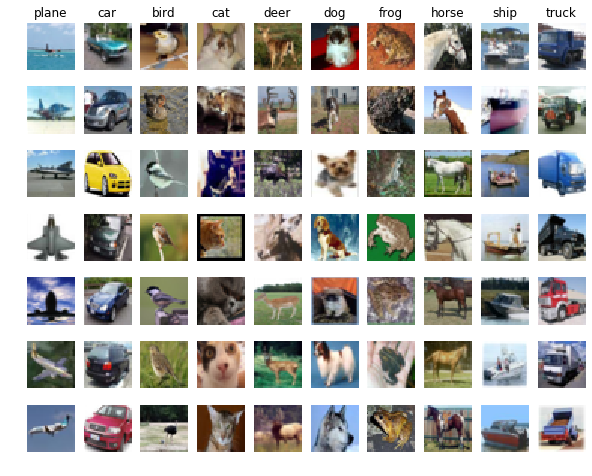

In [0]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [0]:
# Split the data into train, val, and test sets. In addition we will
# create a small development set as a subset of the training data;
# we can use this for development so our code runs faster.
num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500

# Our validation set will be num_validation points from the original
# training set.
mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

# Our training set will be the first num_train points from the original
# training set.
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

# We will also make a development set, which is a small subset of
# the training set.
mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# We use the first num_test points of the original test set as our
# test set.
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)


In [0]:
# Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

# As a sanity check, print out the shapes of the data
print('Training data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)
print('Test data shape: ', X_test.shape)
print('dev data shape: ', X_dev.shape)

Training data shape:  (49000, 3072)
Validation data shape:  (1000, 3072)
Test data shape:  (1000, 3072)
dev data shape:  (500, 3072)


[130.64189796 135.98173469 132.47391837 130.05569388 135.34804082
 131.75402041 130.96055102 136.14328571 132.47636735 131.48467347]


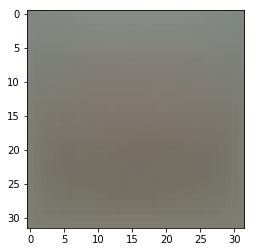

In [0]:
# Preprocessing: subtract the mean image
# first: compute the image mean based on the training data
mean_image = np.mean(X_train, axis=0)
print(mean_image[:10]) # print a few of the elements
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) # visualize the mean image
plt.show()

In [0]:
# second: subtract the mean image from train and test data
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
X_dev -= mean_image

In [0]:
# third: append the bias dimension of ones (i.e. bias trick) so that our SVM
# only has to worry about optimizing a single weight matrix W.
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])

print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

(49000, 3073) (1000, 3073) (1000, 3073) (500, 3073)


In [0]:
from builtins import range
import numpy as np
from random import shuffle
from past.builtins import xrange

def svm_loss_naive(W, X, y, reg):
    """
    Structured SVM loss function, naive implementation (with loops).

    Inputs have dimension D, there are C classes, and we operate on minibatches
    of N examples.

    Inputs:
    - W: A numpy array of shape (D, C) containing weights.
    - X: A numpy array of shape (N, D) containing a minibatch of data.
    - y: A numpy array of shape (N,) containing training labels; y[i] = c means
      that X[i] has label c, where 0 <= c < C.
    - reg: (float) regularization strength

    Returns a tuple of:
    - loss as single float
    - gradient with respect to weights W; an array of same shape as W
    """
    dW = np.zeros(W.shape) # initialize the gradient as zero
    

    # compute the loss and the gradient
    num_classes = W.shape[1]
    num_train = X.shape[0]
    loss = 0.0
    for i in range(num_train):
        scores = X[i].dot(W)
        correct_class_score = scores[y[i]]
        for j in range(num_classes):
            if j == y[i]:
                continue
            margin = scores[j] - correct_class_score + 1 # note delta = 1
            if margin > 0:
                loss += margin
                dW[:, j] += X[i] #3073 x 10
                dW[:, y[i]] -= X[i]
                
    
    # Right now the loss is a sum over all training examples, but we want it
    # to be an average instead so we divide by num_train.
    loss /= num_train
    dW /= num_train
    
    # Add regularization to the loss.
    loss += reg * np.sum(W * W)
    dW += reg * 2 * W
    
    #############################################################################
    # TODO:                                                                     #
    # Compute the gradient of the loss function and store it dW.                #
    # Rather that first computing the loss and then computing the derivative,   #
    # it may be simpler to compute the derivative at the same time that the     #
    # loss is being computed. As a result you may need to modify some of the    #
    # code above to compute the gradient.                                       #
    #############################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    #pass

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    
    return loss, dW



def svm_loss_vectorized(W, X, y, reg):
    """
    Structured SVM loss function, vectorized implementation.

    Inputs and outputs are the same as svm_loss_naive.
    """
    loss = 0.0
    dW = np.zeros(W.shape) # initialize the gradient as zero

    #############################################################################
    # TODO:                                                                     #
    # Implement a vectorized version of the structured SVM loss, storing the    #
    # result in loss.                                                           #
    #############################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    # Compute the loss
    num_classes = W.shape[1]
    num_train = X.shape[0]
    scores = X.dot(W)
    correct_class_scores = scores[ np.arange(num_train), y].reshape(num_train,1)
    margin = np.maximum(0, scores - correct_class_scores + 1)
    margin[ np.arange(num_train), y] = 0 # do not consider correct class in loss
    loss = margin.sum() / num_train

    # Add regularization to the loss.
    loss += reg * np.sum(W * W)

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    #############################################################################
    # TODO:                                                                     #
    # Implement a vectorized version of the gradient for the structured SVM     #
    # loss, storing the result in dW.                                           #
    #                                                                           #
    # Hint: Instead of computing the gradient from scratch, it may be easier    #
    # to reuse some of the intermediate values that you used to compute the     #
    # loss.                                                                     #
    #############################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    # Compute gradient
    margin[margin > 0] = 1
    valid_margin_count = margin.sum(axis=1)
    # Subtract in correct class (-s_y)
    margin[np.arange(num_train),y ] -= valid_margin_count
    dW = (X.T).dot(margin) / num_train

    # Regularization gradient
    dW = dW + reg * 2 * W
    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    return loss, dW


In [0]:
X_train.shape

(49000, 3073)

In [0]:
49000 x 3073 dot 3073 x 10 = 3073 x 10 scores 

In [0]:
# generate a random SVM weight matrix of small numbers
W = np.random.randn(3073, 10) * 0.0001 

loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.000005)
print('loss: %f' % (loss, ))

loss: 9.629204


In [0]:
# Once you've implemented the gradient, recompute it with the code below
# and gradient check it with the function we provided for you

# Compute the loss and its gradient at W.
loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.0)

# Numerically compute the gradient along several randomly chosen dimensions, and
# compare them with your analytically computed gradient. The numbers should match
# almost exactly along all dimensions.
from cs231n.gradient_check import grad_check_sparse
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad)

# do the gradient check once again with regularization turned on
# you didn't forget the regularization gradient did you?
loss, grad = svm_loss_naive(W, X_dev, y_dev, 5e1)
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad)

numerical: -22.266062 analytic: -22.266062, relative error: 1.011434e-11
numerical: -25.361212 analytic: -25.361212, relative error: 6.723568e-12
numerical: -66.960130 analytic: -66.960130, relative error: 6.000445e-12
numerical: 1.237179 analytic: 1.237179, relative error: 1.921891e-10
numerical: 11.764397 analytic: 11.764397, relative error: 1.010914e-11
numerical: -19.821276 analytic: -19.821276, relative error: 1.047185e-11
numerical: 8.496706 analytic: 8.496706, relative error: 1.473035e-11
numerical: -2.343800 analytic: -2.343800, relative error: 1.718066e-10
numerical: -25.981282 analytic: -25.981282, relative error: 9.786368e-12
numerical: 27.785115 analytic: 27.785115, relative error: 1.771619e-12
numerical: -50.088573 analytic: -50.088573, relative error: 2.432214e-12
numerical: 5.995405 analytic: 5.995405, relative error: 6.044553e-11
numerical: 9.684412 analytic: 9.684412, relative error: 2.298490e-11
numerical: 11.860113 analytic: 11.860113, relative error: 2.109771e-11
nu

#### Q1 It is possible that once in a while a dimension in the gradcheck will not match exactly. What could such a discrepancy be caused by? Is it a reason for concern? What is a simple example in one dimension where a gradient check could fail? Hint: the SVM loss function is not strictly speaking differentiable.

It is possible for a dimension to not match. The hinge loss where $max(0, -)$ where x is the difference between the scores of incorrect classes and correct plus a margin $\Delta$. If the score of the correct class is not larger than some $\Delta$ we throw it away. So if x > 0 we have some error, if x < 0 are clamp it to 0. 

So we get 0 loss if the correct class score is > than the incorrect by some $\Delta$. This causes non-differentiable parts of the function. This causes the function to contain sharp points and corners that don't allow a tangent. 

![alt text](https://optimization.mccormick.northwestern.edu/images/e/ed/03_continuous_functions-112.gif)

A non-differentiable function is so because of several simple kinks: 

![alt text](https://optimization.mccormick.northwestern.edu/images/math/3/7/e/37e2d38162e39712d585614a5aeb56a4.png)

which is equivalent to the hinge loss. This will cause the gradient check to fail. For instance, say the $max(0, 2e-5) = 0$, the analytical gradient (the exact) whereas the numerical (approximate) gradient may diff if we have a $ x_2 > 2e-5$. When we do $max(0, 2e-5 + x_2) = c > 0$ and thus the numerical gradient will differ. To reduce the number of kinks we can reduce the amount of data points or use subgradient method via calculating subderivatives to create differentiable convexity out of non-differentiable functions.




In [0]:
import time
# Next implement the function svm_loss_vectorized; for now only compute the loss;
# we will implement the gradient in a moment.
tic = time.time()
loss_naive, grad_naive = svm_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Naive loss: %e computed in %fs' % (loss_naive, toc - tic))

tic = time.time()
loss_vectorized, _ = svm_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))

# The losses should match but your vectorized implementation should be much faster.
print('difference: %f' % (loss_naive - loss_vectorized))

Naive loss: 9.629204e+00 computed in 0.220812s
Vectorized loss: 9.629204e+00 computed in 0.010959s
difference: 0.000000


In [0]:
# Complete the implementation of svm_loss_vectorized, and compute the gradient
# of the loss function in a vectorized way.

# The naive implementation and the vectorized implementation should match, but
# the vectorized version should still be much faster.
tic = time.time()
_, grad_naive = svm_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Naive loss and gradient: computed in %fs' % (toc - tic))

tic = time.time()
_, grad_vectorized = svm_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Vectorized loss and gradient: computed in %fs' % (toc - tic))

# The loss is a single number, so it is easy to compare the values computed
# by the two implementations. The gradient on the other hand is a matrix, so
# we use the Frobenius norm to compare them.
difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('difference: %f' % difference)

Naive loss and gradient: computed in 0.223893s
Vectorized loss and gradient: computed in 0.010343s
difference: 0.000000


In [0]:
svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(X_train, y_train, learning_rate=1e-7, reg=2.5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

iteration 0 / 1500: loss 794.343087
iteration 100 / 1500: loss 290.122591
iteration 200 / 1500: loss 108.010508
iteration 300 / 1500: loss 43.151871
iteration 400 / 1500: loss 18.757146
iteration 500 / 1500: loss 10.313105
iteration 600 / 1500: loss 7.134094
iteration 700 / 1500: loss 6.125501
iteration 800 / 1500: loss 5.621820
iteration 900 / 1500: loss 5.537718
iteration 1000 / 1500: loss 5.549595
iteration 1100 / 1500: loss 5.531409
iteration 1200 / 1500: loss 5.242581
iteration 1300 / 1500: loss 5.292505
iteration 1400 / 1500: loss 5.461824
That took 7.573069s


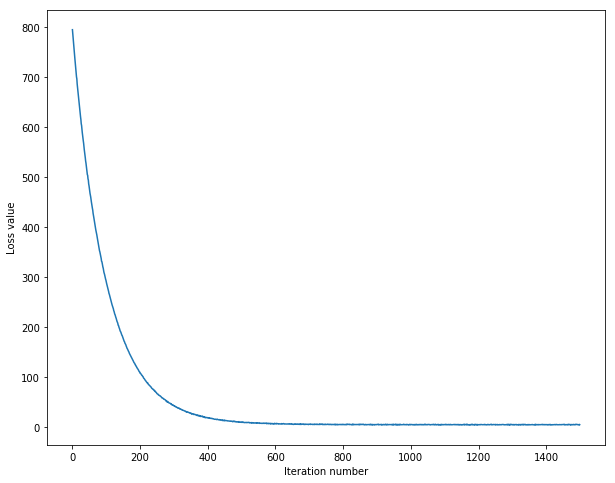

In [0]:
# A useful debugging strategy is to plot the loss as a function of
# iteration number:
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

In [0]:
# Write the LinearSVM.predict function and evaluate the performance on both the
# training and validation set
y_train_pred = svm.predict(X_train)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred), ))
y_val_pred = svm.predict(X_val)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))

training accuracy: 0.372224
validation accuracy: 0.370000


In [0]:

# Use the validation set to tune hyperparameters (regularization strength and
# learning rate). You should experiment with different ranges for the learning
# rates and regularization strengths; if you are careful you should be able to
# get a classification accuracy of about 0.4 on the validation set.
learning_rates = [1e-7, 1e-6]
regularization_strengths = [2e4, 2.5e4, 3e4, 3.5e4, 4e4, 4.5e4, 5e4, 6e4]

# results is dictionary mapping tuples of the form
# (learning_rate, regularization_strength) to tuples of the form
# (training_accuracy, validation_accuracy). The accuracy is simply the fraction
# of data points that are correctly classified.
results = {}
best_val = -1   # The highest validation accuracy that we have seen so far.
best_svm = None # The LinearSVM object that achieved the highest validation rate.

################################################################################
# TODO:                                                                        #
# Write code that chooses the best hyperparameters by tuning on the validation #
# set. For each combination of hyperparameters, train a linear SVM on the      #
# training set, compute its accuracy on the training and validation sets, and  #
# store these numbers in the results dictionary. In addition, store the best   #
# validation accuracy in best_val and the LinearSVM object that achieves this  #
# accuracy in best_svm.                                                        #
#                                                                              #
# Hint: You should use a small value for num_iters as you develop your         #
# validation code so that the SVMs don't take much time to train; once you are #
# confident that your validation code works, you should rerun the validation   #
# code with a larger value for num_iters.                                      #
################################################################################
# Obtain all possible combinations
regs_lrs = [ (lr, rg) for lr in learning_rates for rg in regularization_strengths]

for l, r in regs_lrs:
  
  model = LinearSVM()
  model.train(X_train, y_train, l, r, num_iters=1000)
  preds = model.predict(X_train)
  
  training_accuracy = np.mean( preds == y_train)
  
  val_accuracy = np.mean(model.predict(X_val) == y_val)
  
  results[(l, r)] = (training_accuracy, val_accuracy)
  
  if best_val < val_accuracy:
    best_val = val_accuracy
    best_svm = model

################################################################################
#                              END OF YOUR CODE                                #
################################################################################
    
# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print ('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print ('best validation accuracy achieved during cross-validation: %f' % best_val)

lr 1.000000e-07 reg 2.000000e+04 train accuracy: 0.362735 val accuracy: 0.377000
lr 1.000000e-07 reg 2.500000e+04 train accuracy: 0.371551 val accuracy: 0.394000
lr 1.000000e-07 reg 3.000000e+04 train accuracy: 0.362082 val accuracy: 0.376000
lr 1.000000e-07 reg 3.500000e+04 train accuracy: 0.367592 val accuracy: 0.374000
lr 1.000000e-07 reg 4.000000e+04 train accuracy: 0.356122 val accuracy: 0.371000
lr 1.000000e-07 reg 4.500000e+04 train accuracy: 0.358816 val accuracy: 0.370000
lr 1.000000e-07 reg 5.000000e+04 train accuracy: 0.355959 val accuracy: 0.367000
lr 1.000000e-07 reg 6.000000e+04 train accuracy: 0.351122 val accuracy: 0.356000
lr 1.000000e-06 reg 2.000000e+04 train accuracy: 0.280327 val accuracy: 0.284000
lr 1.000000e-06 reg 2.500000e+04 train accuracy: 0.300714 val accuracy: 0.319000
lr 1.000000e-06 reg 3.000000e+04 train accuracy: 0.291449 val accuracy: 0.307000
lr 1.000000e-06 reg 3.500000e+04 train accuracy: 0.297531 val accuracy: 0.324000
lr 1.000000e-06 reg 4.000000

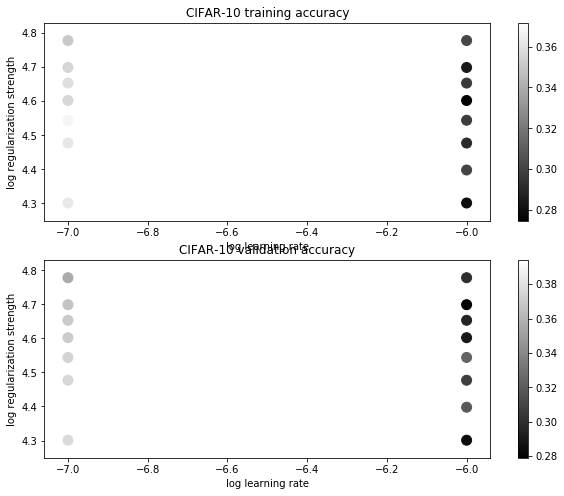

In [0]:
# Visualize the cross-validation results
import math
x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]

# plot training accuracy
marker_size = 100
colors = [results[x][0] for x in results]
plt.subplot(2, 1, 1)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 training accuracy')

# plot validation accuracy
colors = [results[x][1] for x in results] # default size of markers is 20
plt.subplot(2, 1, 2)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 validation accuracy')
plt.show()

In [0]:
# Evaluate the best svm on test set
y_test_pred = best_svm.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print('linear SVM on raw pixels final test set accuracy: %f' % test_accuracy)

linear SVM on raw pixels final test set accuracy: 0.367000


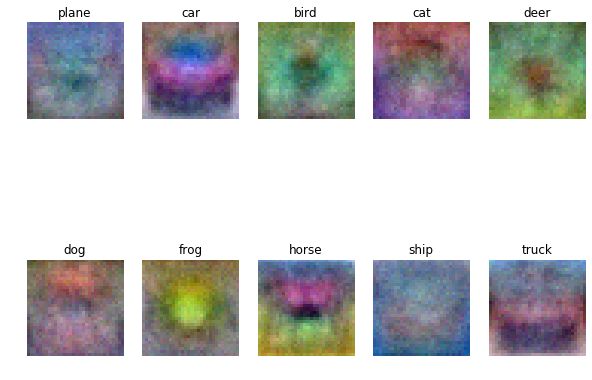

In [0]:
# Visualize the learned weights for each class.
# Depending on your choice of learning rate and regularization strength, these may
# or may not be nice to look at.
w = best_svm.W[:-1,:] # strip out the bias
w = w.reshape(32, 32, 3, 10)
w_min, w_max = np.min(w), np.max(w)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
    plt.subplot(2, 5, i + 1)
      
    # Rescale the weights to be between 0 and 255
    wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])

####Q2 Describe what your visualized SVM weights look like, and offer a brief explanation for why they look they way that they do.

The SVM weights have merged features from different classes. The blurring is a poor accuracy and an attempt to find a pattern which has formed primitive templates for a class. 

The linear function followed by the hinge-loss is showing that in shallow models we learn very vague representations of an object. The weights are representing perhaps the basic colours and shapes of a horse or dog we expect to see. This is akin to having blurry eyes, our eyes then reconstruct the image by adding more pixels. The very early layers of a NN are akin to taking basic shapes and patterns and this representation upsamples in later layers.

## Softmax

In [0]:
def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000, num_dev=500):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the linear classifier. These are the same steps as we used for the
    SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    mask = np.random.choice(num_training, num_dev, replace=False)
    X_dev = X_train[mask]
    y_dev = y_train[mask]
    
    # Preprocessing: reshape the image data into rows
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_val = np.reshape(X_val, (X_val.shape[0], -1))
    X_test = np.reshape(X_test, (X_test.shape[0], -1))
    X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))
    
    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis = 0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image
    X_dev -= mean_image
    
    # add bias dimension and transform into columns
    X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
    X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
    X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
    X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])
    
    return X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev


# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('dev data shape: ', X_dev.shape)
print('dev labels shape: ', y_dev.shape)

Clear previously loaded data.
Train data shape:  (49000, 3073)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3073)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3073)
Test labels shape:  (1000,)
dev data shape:  (500, 3073)
dev labels shape:  (500,)


###Q1 Why do we expect our loss to be close to -log(0.1)?

We have 10 classes in CIFAR10 and since we initial our weights randomly we have not learnt a set of weights that will give a higher log probability to certain classes yet. As such each class is going to get a -log(0.1) probability at this stage since we are just calculating the loss based on some random initial weights. The probability for any class of 10 is 0.1 and the softmax loss is the negative log probability of the correct class => -log(0.1).



https://www.pyimagesearch.com/2016/09/12/softmax-classifiers-explained/

Our loss function minimizes the negative log likelihood of the correct class $L=-logP(Y=yi|X=xi)$.

So we first compute our scores which is just our prediction $y hat = f(xi, W)$ this is just our X.dot(W). 

![alt text](https://camo.githubusercontent.com/32f9c5ef22bafd57cc6ebd588ef1cea64f804f17/68747470733a2f2f75706c6f61642e77696b696d656469612e6f72672f6d6174682f302f392f392f30393931383337623764356135323265626331353666353164616462656430652e706e67)

In [0]:
scores = X_dev.dot(W)

Then we exponentiate the scores.

In [0]:
softmax = softmax(scores)

Next take the denominator, sum the exponents and divide by the sum.

In [0]:
def softmax(z):
  z -= np.max(z)#stability 
  # z = z - np.max(scores[i])
  sm = (np.exp(z).T / np.sum(np.exp(z), axis=1)).T
  return sm

In [0]:
softmax[1], softmax[1].sum()

(array([0.11275538, 0.06810603, 0.05449209, 0.14703653, 0.11037112,
        0.06785717, 0.1226124 , 0.15287036, 0.07765429, 0.08624463]),
 1.0000000000000002)

In [0]:
import numpy as np
from random import shuffle

def sm_loss_naive(W, X, y, reg):
  """
  Softmax loss function, naive implementation (with loops)
  Inputs have dimension D, there are C classes, and we operate on minibatches
  of N examples.
  Inputs:
  - W: A numpy array of shape (D, C) containing weights.
  - X: A numpy array of shape (N, D) containing a minibatch of data.
  - y: A numpy array of shape (N,) containing training labels; y[i] = c means
    that X[i] has label c, where 0 <= c < C.
  - reg: (float) regularization strength
  Returns a tuple of:
  - loss as single float
  - gradient with respect to weights W; an array of same shape as W
  """
  # Initialize the loss and gradient to zero.
  loss = 0.0
  dW = np.zeros_like(W)

  #############################################################################
  # TODO: Compute the softmax loss and its gradient using explicit loops.     #
  # Store the loss in loss and the gradient in dW. If you are not careful     #
  # here, it is easy to run into numeric instability. Don't forget the        #
  # regularization!                                                           #
  #############################################################################
  scores = X.dot(W)
  num_train = X.shape[0]
  num_classes = W.shape[1]

  # Softmax Loss
  for i in range(num_train):
    f = scores[i] - np.max(scores[i]) # avoid numerical instability
    softmax = np.exp(f)/np.sum(np.exp(f))
    loss += -np.log(softmax[y[i]])
    # Weight Gradients
    for j in range(num_classes):
      dW[:,j] += X[i] * softmax[j]
    dW[:,y[i]] -= X[i]

  # Average
  loss /= num_train
  dW /= num_train

  # Regularization
  loss += reg * np.sum(W * W)
  dW += reg * 2 * W

  #############################################################################
  #                          END OF YOUR CODE                                 #
  #############################################################################

  return loss, dW


def softmax_loss_vectorized(W, X, y, reg):
  """
  Softmax loss function, vectorized version.
  Inputs and outputs are the same as softmax_loss_naive.
  """
  # Initialize the loss and gradient to zero.
  loss = 0.0
  dW = np.zeros_like(W)

  #############################################################################
  # TODO: Compute the softmax loss and its gradient using no explicit loops.  #
  # Store the loss in loss and the gradient in dW. If you are not careful     #
  # here, it is easy to run into numeric instability. Don't forget the        #
  # regularization!                                                           #
  #############################################################################
  num_train = X.shape[0]
  num_classes = W.shape[0]
  
  scores = X.dot(W)
  scores = scores - np.max(scores)
  #
  #softmax = np.exp(scores).sum(axis=1, keepdims=True)
  softmax = (np.exp(scores).T / np.sum(np.exp(scores), axis=1)).T
  #
  loss = np.sum(-np.log(softmax[np.arange(num_train), y]))
  loss /= num_train
  dW = X.T.dot(softmax)
  dW /= num_train
  #loss = (-1 / num_train) * np.sum( y * np.log(softmax)) + (reg/2)* np.sum(w*w)
  #dW = (-1 / num_train) * np.dot(x.T, (y - softmax)) + reg*w
  loss += reg * np.sum(W * W)
  dW += reg * 2 * W
  #############################################################################
  #                          END OF YOUR CODE                                 #
  #############################################################################

  return loss, dW

In [0]:
# First implement the naive softmax loss function with nested loops.
# Open the file cs231n/classifiers/softmax.py and implement the
# softmax_loss_naive function.

import time

# Generate a random softmax weight matrix and use it to compute the loss.
W = np.random.randn(3073, 10) * 0.0001
loss, grad = sm_loss_naive(W, X_dev, y_dev, 0.0)

# As a rough sanity check, our loss should be something close to -log(0.1).
print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))

loss: 2.349806
sanity check: 2.302585


In [0]:
# Complete the implementation of softmax_loss_naive and implement a (naive)
# version of the gradient that uses nested loops.
loss, grad = sm_loss_naive(W, X_dev, y_dev, 0.0)

# As we did for the SVM, use numeric gradient checking as a debugging tool.
# The numeric gradient should be close to the analytic gradient.
f = lambda w: sm_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

# similar to SVM case, do another gradient check with regularization
loss, grad = sm_loss_naive(W, X_dev, y_dev, 5e1)
f = lambda w: sm_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

numerical: 0.813576 analytic: 0.813576, relative error: 3.668324e-08
numerical: 0.300265 analytic: 0.300265, relative error: 2.220648e-08
numerical: -0.825450 analytic: -0.825451, relative error: 5.745608e-08
numerical: 2.926335 analytic: 2.926335, relative error: 4.453822e-09
numerical: 0.208880 analytic: 0.208880, relative error: 6.941112e-08
numerical: -0.746952 analytic: -0.746952, relative error: 3.594092e-08
numerical: -1.697937 analytic: -1.697937, relative error: 5.637411e-08
numerical: 0.191594 analytic: 0.191594, relative error: 1.250535e-07
numerical: 0.494239 analytic: 0.494239, relative error: 1.508144e-07
numerical: 2.237037 analytic: 2.237036, relative error: 3.216516e-08
numerical: 1.188791 analytic: 1.188791, relative error: 2.063737e-08
numerical: -2.442159 analytic: -2.442159, relative error: 1.436301e-08
numerical: -0.143075 analytic: -0.143075, relative error: 3.572297e-07
numerical: -1.032313 analytic: -1.032313, relative error: 6.124517e-08
numerical: 1.378319 an

In [0]:
# Now that we have a naive implementation of the softmax loss function and its gradient,
# implement a vectorized version in softmax_loss_vectorized.
# The two versions should compute the same results, but the vectorized version should be
# much faster.
tic = time.time()
loss_naive, grad_naive = sm_loss_naive(W, X_dev, y_dev, 0.00001)
toc = time.time()
print ('naive loss: %e computed in %fs' % (loss_naive, toc - tic))

tic = time.time()
loss_vectorized, grad_vectorized = sm_loss_vectorized(W, X_dev, y_dev, 0.00001)
toc = time.time()
print( 'vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))

# As we did for the SVM, we use the Frobenius norm to compare the two versions
# of the gradient.
grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print ('Loss difference: %f' % np.abs(loss_naive - loss_vectorized))
print ('Gradient difference: %f' % grad_difference)

naive loss: 2.349806e+00 computed in 0.066132s
vectorized loss: 2.349806e+00 computed in 0.005763s
Loss difference: 0.000000
Gradient difference: 0.000000


In [0]:
learning_rates = 10 ** np.random.uniform(-6, 1)
learning_rate

0.0004678655405175071

In [0]:
class LinearClassifier(object):

  def __init__(self):
    self.W = None

  def train(self, X, y, learning_rate=1e-3, reg=1e-5, num_iters=100,
            batch_size=200, verbose=False):
    """
    Train this linear classifier using stochastic gradient descent.
    Inputs:
    - X: A numpy array of shape (N, D) containing training data; there are N
      training samples each of dimension D.
    - y: A numpy array of shape (N,) containing training labels; y[i] = c
      means that X[i] has label 0 <= c < C for C classes.
    - learning_rate: (float) learning rate for optimization.
    - reg: (float) regularization strength.
    - num_iters: (integer) number of steps to take when optimizing
    - batch_size: (integer) number of training examples to use at each step.
    - verbose: (boolean) If true, print progress during optimization.
    Outputs:
    A list containing the value of the loss function at each training iteration.
    """
    num_train, dim = X.shape
    num_classes = np.max(y) + 1 # assume y takes values 0...K-1 where K is number of classes
    if self.W is None:
      # lazily initialize W
      self.W = 0.001 * np.random.randn(dim, num_classes)

    # Run stochastic gradient descent to optimize W
    loss_history = []
    for it in range(num_iters):
      X_batch = None
      y_batch = None

      #########################################################################
      # TODO:                                                                 #
      # Sample batch_size elements from the training data and their           #
      # corresponding labels to use in this round of gradient descent.        #
      # Store the data in X_batch and their corresponding labels in           #
      # y_batch; after sampling X_batch should have shape (dim, batch_size)   #
      # and y_batch should have shape (batch_size,)                           #
      #                                                                       #
      # Hint: Use np.random.choice to generate indices. Sampling with         #
      # replacement is faster than sampling without replacement.              #
      #########################################################################
      #Sampling with replacement is used to find probability with replacement. 
      #In other words, you want to find the probability of some event where 
      #there’s a number of balls, cards or other objects, and you replace the 
      #item each time you choose one.
      
      random_idxs = np.random.choice(num_train, batch_size, replace=True)
      X_batch = X[random_idxs]
      y_batch = y[random_idxs]
      #########################################################################
      #                       END OF YOUR CODE                                #
      #########################################################################

      # evaluate loss and gradient
      loss, grad = self.loss(X_batch, y_batch, reg)
      loss_history.append(loss)

      # perform parameter update
      #########################################################################
      # TODO:                                                                 #
      # Update the weights using the gradient and the learning rate.          #
      #########################################################################
      self.W -= learning_rate * grad
      #########################################################################
      #                       END OF YOUR CODE                                #
      #########################################################################

      if verbose and it % 100 == 0:
        print('iteration %d / %d: loss %f' % (it, num_iters, loss))

    return loss_history

  def predict(self, X):
    """
    Use the trained weights of this linear classifier to predict labels for
    data points.
    Inputs:
    - X: A numpy array of shape (N, D) containing training data; there are N
      training samples each of dimension D.
    Returns:
    - y_pred: Predicted labels for the data in X. y_pred is a 1-dimensional
      array of length N, and each element is an integer giving the predicted
      class.
    """
    y_pred = np.zeros(X.shape[0])
    ###########################################################################
    # TODO:                                                                   #
    # Implement this method. Store the predicted labels in y_pred.            #
    ###########################################################################
    scores = X.dot(self.W)
    y_pred = np.argmax(scores, axis=1)
    ###########################################################################
    #                           END OF YOUR CODE                              #
    ###########################################################################
    return y_pred
  
  def loss(self, X_batch, y_batch, reg):
    """
    Compute the loss function and its derivative. 
    Subclasses will override this.
    Inputs:
    - X_batch: A numpy array of shape (N, D) containing a minibatch of N
      data points; each point has dimension D.
    - y_batch: A numpy array of shape (N,) containing labels for the minibatch.
    - reg: (float) regularization strength.
    Returns: A tuple containing:
    - loss as a single float
    - gradient with respect to self.W; an array of the same shape as W
    """
    pass


class LinearSVM(LinearClassifier):
  """ A subclass that uses the Multiclass SVM loss function """

  def loss(self, X_batch, y_batch, reg):
    return svm_loss_vectorized(self.W, X_batch, y_batch, reg)


class Softmax(LinearClassifier):
  """ A subclass that uses the Softmax + Cross-entropy loss function """

  def loss(self, X_batch, y_batch, reg):
    return sm_loss_vectorized(self.W, X_batch, y_batch, reg)

In [0]:
# Use the validation set to tune hyperparameters (regularization strength and
# learning rate). You should experiment with different ranges for the learning
# rates and regularization strengths; if you are careful you should be able to
# get a classification accuracy of over 0.35 on the validation set.
results = {}
best_val = -1
best_softmax = None
learning_rates = [1e-7, 2e-6, 2.5e-6]
regularization_strengths = [1e3, 1e4, 2e4, 2.5e4, 3e4, 3.5e4]

In [0]:
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained softmax classifer in best_softmax.                          #
################################################################################
# hyperparameter optimization 
# via random search as noted in
# http://cs231n.github.io/neural-networks-3/#hyper
regs_lrs = [ (lr, rg) for lr in learning_rates for rg in regularization_strengths]
for l, r in regs_lrs:
  
  model = Softmax()
  model.train(X_train, y_train, l, r, num_iters=1000)
  preds = model.predict(X_train)
  training_accuracy = np.mean( preds == y_train)
  val_accuracy = np.mean(model.predict(X_val) == y_val)
  results[(l, r)] = (training_accuracy, val_accuracy)
  if best_val < val_accuracy:
    best_val = val_accuracy
    best_softmax = model

################################################################################
#                              END OF YOUR CODE                                #
################################################################################
    
# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print ('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print ('best validation accuracy achieved during cross-validation: %f' % best_val)

lr 1.000000e-07 reg 1.000000e+03 train accuracy: 0.235837 val accuracy: 0.233000
lr 1.000000e-07 reg 1.000000e+04 train accuracy: 0.329265 val accuracy: 0.329000
lr 1.000000e-07 reg 2.000000e+04 train accuracy: 0.334918 val accuracy: 0.353000
lr 1.000000e-07 reg 2.500000e+04 train accuracy: 0.331306 val accuracy: 0.343000
lr 1.000000e-07 reg 3.000000e+04 train accuracy: 0.322755 val accuracy: 0.338000
lr 1.000000e-07 reg 3.500000e+04 train accuracy: 0.315510 val accuracy: 0.329000
lr 2.000000e-06 reg 1.000000e+03 train accuracy: 0.385673 val accuracy: 0.396000
lr 2.000000e-06 reg 1.000000e+04 train accuracy: 0.335020 val accuracy: 0.341000
lr 2.000000e-06 reg 2.000000e+04 train accuracy: 0.277347 val accuracy: 0.295000
lr 2.000000e-06 reg 2.500000e+04 train accuracy: 0.294224 val accuracy: 0.311000
lr 2.000000e-06 reg 3.000000e+04 train accuracy: 0.297061 val accuracy: 0.311000
lr 2.000000e-06 reg 3.500000e+04 train accuracy: 0.284918 val accuracy: 0.284000
lr 2.500000e-06 reg 1.000000

In [0]:
# evaluate on test set
# Evaluate the best softmax on test set
y_test_pred = best_softmax.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print('softmax on raw pixels final test set accuracy: %f' % (test_accuracy, ))

softmax on raw pixels final test set accuracy: 0.368000


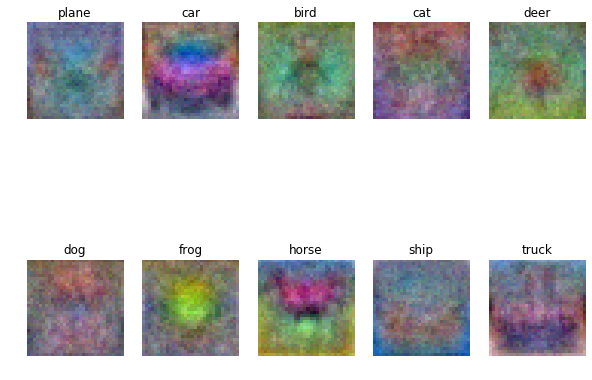

In [0]:

# Visualize the learned weights for each class
w = best_softmax.W[:-1,:] # strip out the bias
w = w.reshape(32, 32, 3, 10)

w_min, w_max = np.min(w), np.max(w)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in xrange(10):
  plt.subplot(2, 5, i + 1)
  
  # Rescale the weights to be between 0 and 255
  wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
  plt.imshow(wimg.astype('uint8'))
  plt.axis('off')
  plt.title(classes[i])

###Q True or False: its possible to add a new datapoint to a training set that would leave the SVM loss uchanged, but this is not the case with the softmax classifier loss?

True, 

Let's assume that we add a new datapoint that leads to scores [10,8,7], also that the margin for SVM is 2 and the correct class is 1, then the SVM loss of this datapoint will be 0 because it satisfies the margin, i.e., max(0, 8 + 2 - 10) + max(0, 7 + 2 - 10) = 0. Thus, the loss remains unchanged. However, it is not the case for Softmax classifier where the loss will increase, i.e., -log(softmax(10)) = -log(0.84) = 0.17. This occurs because the SVM loss is local objective, that is, it does not care about the details of individual scores only the margin has to be satisfied. On the other hand, the Softmax classifier considers all the individual scores in the calculation of the loss.

#Neural Network



In [0]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [0]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

In [0]:
net = init_toy_model()
X, y = init_toy_data()

In [0]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print(scores)
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]
Difference between your scores and correct scores:
3.6802720745909845e-08


####Derivatives refresh

https://hmkcode.github.io/ai/backpropagation-step-by-step/

https://towardsdatascience.com/step-by-step-the-math-behind-neural-networks-490dc1f3cfd9

https://arxiv.org/pdf/1802.01528.pdf

What is the derivative of xy, i.e. x * y. How does the product xy change when we alter the variables? That depends on if we are changing x or y. We therefore compute the derivative with respect to one variable at a time, giving 2 partial derivatives - one for x and one for y. For partial derivatives we treat the other variable as a constant (hence why they're called partial derivatives, we only observe the changes in one of the variables!). Consider the function $f(x,y) = 3x^2y$. The partial derivative w.r.t x $\frac{\partial}{\partial x}3x^2y$. There are the 3 constants from the perspective of $\frac{\partial}{\partial x}$: 3, 2, and y. ... Do i continue? 

In [0]:
import numpy as np
import matplotlib.pyplot as plt

class TwoLayerNet(object):
  """
  A two-layer fully-connected neural network. The net has an input dimension of
  N, a hidden layer dimension of H, and performs classification over C classes.
  We train the network with a softmax loss function and L2 regularization on the
  weight matrices. The network uses a ReLU nonlinearity after the first fully
  connected layer.
  In other words, the network has the following architecture:
  input - fully connected layer - ReLU - fully connected layer - softmax
  The outputs of the second fully-connected layer are the scores for each class.
  """

  def __init__(self, input_size, hidden_size, output_size, std=1e-4):
    """
    Initialize the model. Weights are initialized to small random values and
    biases are initialized to zero. Weights and biases are stored in the
    variable self.params, which is a dictionary with the following keys:
    W1: First layer weights; has shape (D, H)
    b1: First layer biases; has shape (H,)
    W2: Second layer weights; has shape (H, C)
    b2: Second layer biases; has shape (C,)
    Inputs:
    - input_size: The dimension D of the input data.
    - hidden_size: The number of neurons H in the hidden layer.
    - output_size: The number of classes C.
    """
    self.params = {}
    self.params['W1'] = std * np.random.randn(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = std * np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)

  def loss(self, X, y=None, reg=0.0):
    """
    Compute the loss and gradients for a two layer fully connected neural
    network.
    Inputs:
    - X: Input data of shape (N, D). Each X[i] is a training sample.
    - y: Vector of training labels. y[i] is the label for X[i], and each y[i] is
      an integer in the range 0 <= y[i] < C. This parameter is optional; if it
      is not passed then we only return scores, and if it is passed then we
      instead return the loss and gradients.
    - reg: Regularization strength.
    Returns:
    If y is None, return a matrix scores of shape (N, C) where scores[i, c] is
    the score for class c on input X[i].
    If y is not None, instead return a tuple of:
    - loss: Loss (data loss and regularization loss) for this batch of training
      samples.
    - grads: Dictionary mapping parameter names to gradients of those parameters
      with respect to the loss function; has the same keys as self.params.
    """
    # Unpack variables from the params dictionary
    W1, b1 = self.params['W1'], self.params['b1']
    W2, b2 = self.params['W2'], self.params['b2']
    N, D = X.shape

    # Compute the forward pass
    scores = None
    #############################################################################
    # TODO: Perform the forward pass, computing the class scores for the input. #
    # Store the result in the scores variable, which should be an array of      #
    # shape (N, C).                                                             #
    #############################################################################
    
    l1 = np.dot(X, W1) + b1 # linear layer
    X2 = np.maximum(0, l1) # relu activation
    scores = np.dot(X2, W2) + b2 # linear layer
    
    #############################################################################
    #                              END OF YOUR CODE                             #
    #######################################################################3######
    
    # If the targets are not given then jump out, we're done
    if y is None:
      return scores

    # Compute the loss
    loss = None
    #############################################################################
    # TODO: Finish the forward pass, and compute the loss. This should include  #
    # both the data loss and L2 regularization for W1 and W2. Store the result  #
    # in the variable loss, which should be a scalar. Use the Softmax           #
    # classifier loss.                                                          #
    #############################################################################
    
    scores -= np.max(scores)
    
    softmax_probs = np.exp(scores) / np.sum(np.exp(scores), axis=1, keepdims=True)
    
    loss = np.sum(-np.log(softmax_probs[range(N), y]))
    
    loss /= N
    
    loss += reg * (np.sum(W1 * W1) + np.sum(W2 * W2))
    
    #############################################################################
    #                              END OF YOUR CODE                             #
    #############################################################################

    # Backward pass: compute gradients
    grads = {}
    #############################################################################
    # TODO: Compute the backward pass, computing the derivatives of the weights #
    # and biases. Store the results in the grads dictionary. For example,       #
    # grads['W1'] should store the gradient on W1, and be a matrix of same size #
    #############################################################################
    softmax_probs[np.arange(N) ,y] -= 1
    softmax_probs /= N
    
    # W2 gradient
    dW2 = X2.T.dot(softmax_probs)   

    # b2 gradient
    db2 = softmax_probs.sum(axis=0)

    # W1 gradient
    dW1 = softmax_probs.dot(W2.T)    
    dfc1 = dW1 * (l1>0)             
    dW1 = X.T.dot(dfc1)              

    # b1 gradient
    db1 = dfc1.sum(axis=0)

    # regularization gradient
    dW1 += reg * 2 * W1
    dW2 += reg * 2 * W2

    grads = {'W1':dW1, 'b1':db1, 'W2':dW2, 'b2':db2}
    #############################################################################
    #                              END OF YOUR CODE                             #
    #############################################################################

    return loss, grads

  def train(self, X, y, X_val, y_val,
            learning_rate=1e-3, learning_rate_decay=0.95,
            reg=5e-6, num_iters=100,
            batch_size=200, verbose=False):
    """
    Train this neural network using stochastic gradient descent.
    Inputs:
    - X: A numpy array of shape (N, D) giving training data.
    - y: A numpy array f shape (N,) giving training labels; y[i] = c means that
      X[i] has label c, where 0 <= c < C.
    - X_val: A numpy array of shape (N_val, D) giving validation data.
    - y_val: A numpy array of shape (N_val,) giving validation labels.
    - learning_rate: Scalar giving learning rate for optimization.
    - learning_rate_decay: Scalar giving factor used to decay the learning rate
      after each epoch.
    - reg: Scalar giving regularization strength.
    - num_iters: Number of steps to take when optimizing.
    - batch_size: Number of training examples to use per step.
    - verbose: boolean; if true print progress during optimization.
    """
    num_train = X.shape[0]
    iterations_per_epoch = max(num_train / batch_size, 1)

    # Use SGD to optimize the parameters in self.model
    loss_history = []
    train_acc_history = []
    val_acc_history = []

    for it in range(num_iters):
      X_batch = None
      y_batch = None

      #########################################################################
      # TODO: Create a random minibatch of training data and labels, storing  #
      # them in X_batch and y_batch respectively.                             #
      #########################################################################
      random_idxs = np.random.choice(num_train, batch_size)
      X_batch = X[random_idxs] 
      y_batch = y[random_idxs]      
      #########################################################################
      #                             END OF YOUR CODE                          #
      #########################################################################

      # Compute loss and gradients using the current minibatch
      loss, grads = self.loss(X_batch, y=y_batch, reg=reg)
      loss_history.append(loss)

      #########################################################################
      # TODO: Use the gradients in the grads dictionary to update the         #
      # parameters of the network (stored in the dictionary self.params)      #
      # using stochastic gradient descent. You'll need to use the gradients   #
      # stored in the grads dictionary defined above.                         #
      #########################################################################
      
      for param in self.params:
        self.params[param] -= learning_rate * grads[param]
      
      #########################################################################
      #                             END OF YOUR CODE                          #
      #########################################################################

      if verbose and it % 100 == 0:
        print('iteration %d / %d: loss %f' % (it, num_iters, loss))

      # Every epoch, check train and val accuracy and decay learning rate.
      if it % iterations_per_epoch == 0:
        # Check accuracy
        train_acc = (self.predict(X_batch) == y_batch).mean()
        val_acc = (self.predict(X_val) == y_val).mean()
        train_acc_history.append(train_acc)
        val_acc_history.append(val_acc)

        # Decay learning rate
        learning_rate *= learning_rate_decay

    return {
      'loss_history': loss_history,
      'train_acc_history': train_acc_history,
      'val_acc_history': val_acc_history,
    }

  def predict(self, X):
    """
    Use the trained weights of this two-layer network to predict labels for
    data points. For each data point we predict scores for each of the C
    classes, and assign each data point to the class with the highest score.
    Inputs:
    - X: A numpy array of shape (N, D) giving N D-dimensional data points to
      classify.
    Returns:
    - y_pred: A numpy array of shape (N,) giving predicted labels for each of
      the elements of X. For all i, y_pred[i] = c means that X[i] is predicted
      to have class c, where 0 <= c < C.
    """
    y_pred = None

    ###########################################################################
    # TODO: Implement this function; it should be VERY simple!                #
    ###########################################################################
    y_pred = np.argmax(self.loss(X), axis=1)
    ###########################################################################
    #                              END OF YOUR CODE                           #
    ###########################################################################

    return y_pred



In [0]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
9.737461985636896


In [0]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 3.448530e-08
b1 max relative error: 9.885034e-07
W2 max relative error: 2.226434e-08
b2 max relative error: 7.959299e-09


Final training loss:  0.01714960793873207


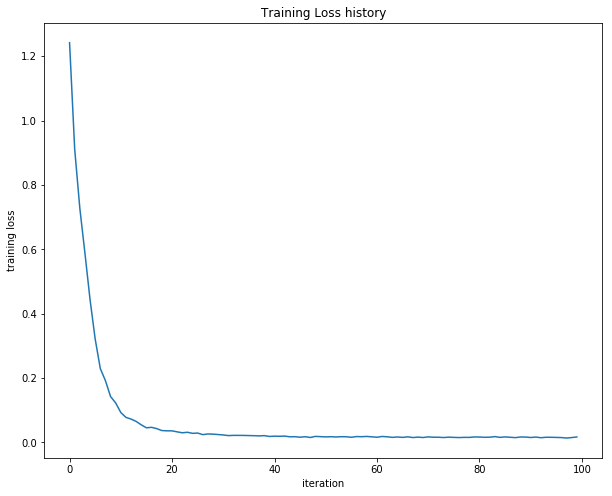

In [0]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

In [0]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


In [0]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 1000: loss 2.302970
iteration 100 / 1000: loss 2.302474
iteration 200 / 1000: loss 2.297076
iteration 300 / 1000: loss 2.257328
iteration 400 / 1000: loss 2.230484
iteration 500 / 1000: loss 2.150620
iteration 600 / 1000: loss 2.080736
iteration 700 / 1000: loss 2.054914
iteration 800 / 1000: loss 1.979290
iteration 900 / 1000: loss 2.039101
Validation accuracy:  0.287


One strategy to debug is to plot the loss function and the accuracies on the training and validation sets during optimization.

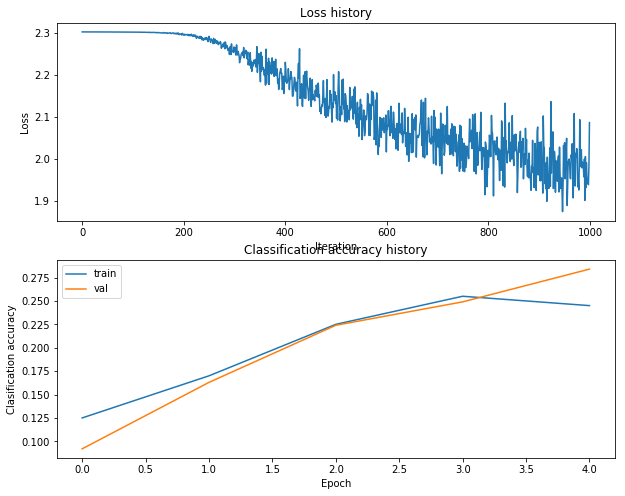

In [0]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

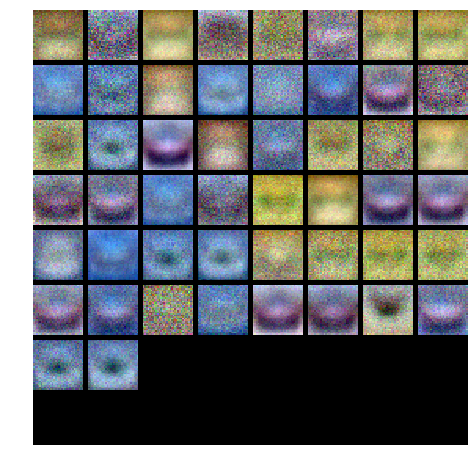

In [0]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

From the images above we see the loss is decreasing less linearly, which suggests the learning rate may be too low. What's more is that there is no gap between training and validation accuracy, suggesting the model we used has low capacity, and that we should increase its size. With a very large model we expect to see overfitting and a large gap between training and validation accuracy. 

We should tune the hyperparameters i.e. change hidden layer size, learning rate, epochs, regularization strength. Also consider tuning the learning rate decay. 

Approximate results. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

Experiment: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. For every 1% above 52% on the Test set we will award you with one extra bonus point. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [0]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
best_val = -1
best_stats = None
learning_rates = [2e-3, 3e-2, 1e-3]
regularization_strengths = [1e-1, 0.25, 1.500000e-01]
input_size = 32 * 32 * 3
hidden_size = [80, 200, 400]
iters = 2000
lr_decay = [0.85, 0.95, 0.97]
num_classes = 10

for i in range(3):
  print('Starting training...')
  model = TwoLayerNet(input_size, hidden_size[i], num_classes)
  #Train the net
  stats = model.train(X_train, y_train, X_val, y_val,
                     num_iters=iters, batch_size=200,
                     learning_rate=learning_rates[i], learning_rate_decay=lr_decay[i],
                     reg=regularization_strengths[i])
  print('Trained...')
  y_trn_pred = model.predict(X_train)
  accuracy_training = np.mean(y_train == y_trn_pred)
  y_val_pred = model.predict(X_val)
  accuracy_val = np.mean(y_val == y_val_pred)
  
  # Save best values
  if accuracy_val > best_val:
      best_val = accuracy_val
      best_net = model
      best_stats = stats
    
    # Print results
  print('lr %e reg %e hid %d  train accuracy: %f val accuracy: %f learning rate decay: %f' % (
                learning_rates[i], regularization_strengths[i], hidden_size[i], accuracy_training, accuracy_val, lr_decay[i]))
print('best validation accuracy achieved: %f' % best_val)          
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

Starting training...
lr 2.000000e-03 reg 1.000000e-01 hid 80  train accuracy: 0.566551 val accuracy: 0.515000 learning rate decay: 0.850000
Starting training...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:94: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:122: RuntimeWarning: invalid value encountered in greater


lr 3.000000e-02 reg 2.500000e-01 hid 200  train accuracy: 0.100265 val accuracy: 0.087000 learning rate decay: 0.950000
Starting training...
lr 1.000000e-03 reg 1.500000e-01 hid 400  train accuracy: 0.568571 val accuracy: 0.509000 learning rate decay: 0.970000
best validation accuracy achieved: 0.515000


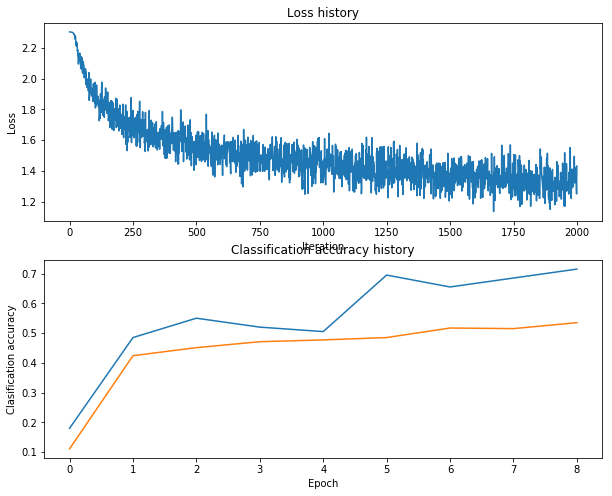

In [0]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

iteration 0 / 5000: loss 2.304092
iteration 100 / 5000: loss 1.695151
iteration 200 / 5000: loss 1.528207
iteration 300 / 5000: loss 1.622591
iteration 400 / 5000: loss 1.585002
iteration 500 / 5000: loss 1.512646
iteration 600 / 5000: loss 1.524916
iteration 700 / 5000: loss 1.451516
iteration 800 / 5000: loss 1.362892
iteration 900 / 5000: loss 1.403761
iteration 1000 / 5000: loss 1.522753
iteration 1100 / 5000: loss 1.390092
iteration 1200 / 5000: loss 1.364044
iteration 1300 / 5000: loss 1.495585
iteration 1400 / 5000: loss 1.427209
iteration 1500 / 5000: loss 1.384946
iteration 1600 / 5000: loss 1.324920
iteration 1700 / 5000: loss 1.319747
iteration 1800 / 5000: loss 1.282501
iteration 1900 / 5000: loss 1.241484
iteration 2000 / 5000: loss 1.243824
iteration 2100 / 5000: loss 1.330488
iteration 2200 / 5000: loss 1.325000
iteration 2300 / 5000: loss 1.328127
iteration 2400 / 5000: loss 1.242729
iteration 2500 / 5000: loss 1.267973
iteration 2600 / 5000: loss 1.271145
iteration 270

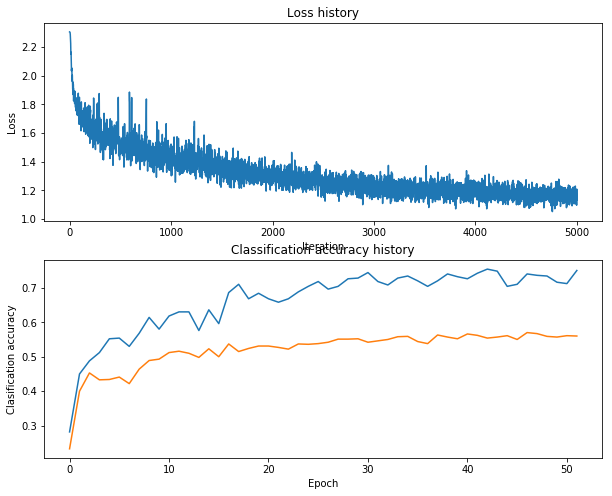

In [0]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
input_size = 32 * 32 * 3
hidden_size = 200
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=5000, batch_size=500,
            learning_rate=3e-3, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

best_net = net

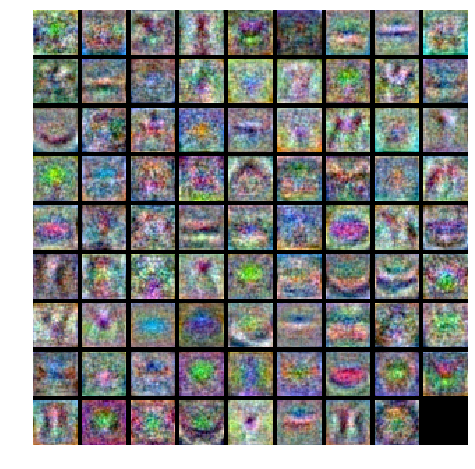

In [0]:
# visualize the weights of the best network
show_net_weights(best_net)

In [0]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.526


iteration 0 / 5000: loss 2.302838
iteration 100 / 5000: loss 1.799534
iteration 200 / 5000: loss 1.540707
iteration 300 / 5000: loss 1.532025
iteration 400 / 5000: loss 1.593710
iteration 500 / 5000: loss 1.468331
iteration 600 / 5000: loss 1.430647
iteration 700 / 5000: loss 1.407783
iteration 800 / 5000: loss 1.440410
iteration 900 / 5000: loss 1.405607
iteration 1000 / 5000: loss 1.446120
iteration 1100 / 5000: loss 1.379011
iteration 1200 / 5000: loss 1.294560
iteration 1300 / 5000: loss 1.261283
iteration 1400 / 5000: loss 1.276022
iteration 1500 / 5000: loss 1.266879
iteration 1600 / 5000: loss 1.217623
iteration 1700 / 5000: loss 1.253996
iteration 1800 / 5000: loss 1.290908
iteration 1900 / 5000: loss 1.240948
iteration 2000 / 5000: loss 1.214331
iteration 2100 / 5000: loss 1.205628
iteration 2200 / 5000: loss 1.172689
iteration 2300 / 5000: loss 1.195147
iteration 2400 / 5000: loss 1.239481
iteration 2500 / 5000: loss 1.119841
iteration 2600 / 5000: loss 1.160838
iteration 270

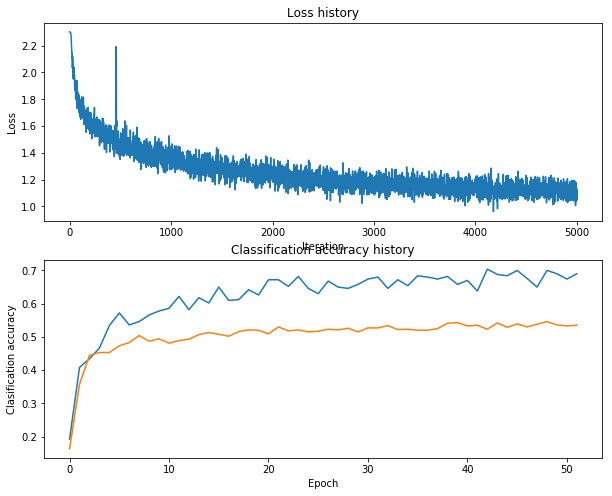

In [0]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
input_size = 32 * 32 * 3
hidden_size = 80
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=5000, batch_size=500,
            learning_rate=2.000000e-03, learning_rate_decay=0.95,
            reg=1.000000e-01, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

best_net = net

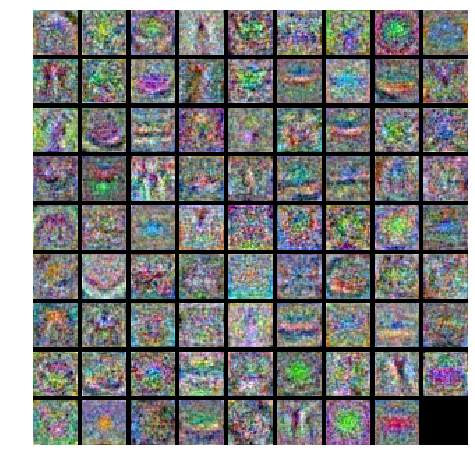

Test accuracy:  0.515


In [0]:
show_net_weights(best_net)
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

####Q Now we have trained, you may find your test accuracy is much lower than your training accuracy. How can we decrease this gap?

1. train on larger datasets
2. add more hidden units
3. increase the regularisation strength
4. none of the above.

When test accuracy is lower than training (this is expected) this shows the model is struggling to generalise to unseen test examples. 

Adding more data will mean the model will be able to generalize better by preventing overfitting the model from simply memorizing the training data. Similarly adding more hidden units will increase overfitting which does not help generalisation. The model will be able to accurately guess each class in the training by finding some minima and creating an even more complex function of the training data. Increasing regularisation means the weights are diffused so the function will be less complex. 

#Features

In [0]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

###Extract Features

For each image we will compute a Histogram of Oriented Gradients (HOG) as well as a color histogram using the hue channel in HSV color space. We form our final feature vector for each image by concatenating the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring color information, and the color histogram represents the color of the input image while ignoring texture. As a result, we expect that using both together ought to work better than using either alone. Verifying this assumption would be a good thing to try for the bonus section.

The hog_feature and color_histogram_hsv functions both operate on a single image and return a feature vector for that image. The extract_features function takes a set of images and a list of feature functions and evaluates each feature function on each image, storing the results in a matrix where each column is the concatenation of all feature vectors for a single image.

In [0]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

In [0]:
# Use the validation set to tune the learning rate and regularization strength

learning_rates = [1e-9, 1e-8, 1e-7]
regularization_strengths = [5e4, 5e5, 5e6]

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
lrs_regs = [(lr, reg) for lr in learning_rates for reg in regularization_strengths]

for lr, regs in lrs_regs:
  svm = LinearSVM()
  svm.train(X_train_feats, y_train, lr, regs, num_iters=1500)
  train_acc = np.mean(y_train == svm.predict(X_train_feats))
  val_acc = np.mean(y_val == svm.predict(X_val_feats))
  results[(lr, regs)] = (train_acc, val_acc)
  
  if val_acc > best_val:
    best_val = val_acc
    best_svm = svm

################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)


lr 1.000000e-09 reg 5.000000e+04 train accuracy: 0.133878 val accuracy: 0.150000
lr 1.000000e-09 reg 5.000000e+05 train accuracy: 0.086204 val accuracy: 0.103000
lr 1.000000e-09 reg 5.000000e+06 train accuracy: 0.409857 val accuracy: 0.403000
lr 1.000000e-08 reg 5.000000e+04 train accuracy: 0.089735 val accuracy: 0.082000
lr 1.000000e-08 reg 5.000000e+05 train accuracy: 0.417592 val accuracy: 0.420000
lr 1.000000e-08 reg 5.000000e+06 train accuracy: 0.390918 val accuracy: 0.391000
lr 1.000000e-07 reg 5.000000e+04 train accuracy: 0.412510 val accuracy: 0.415000
lr 1.000000e-07 reg 5.000000e+05 train accuracy: 0.407306 val accuracy: 0.408000
lr 1.000000e-07 reg 5.000000e+06 train accuracy: 0.315694 val accuracy: 0.327000
best validation accuracy achieved during cross-validation: 0.420000


In [0]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.423


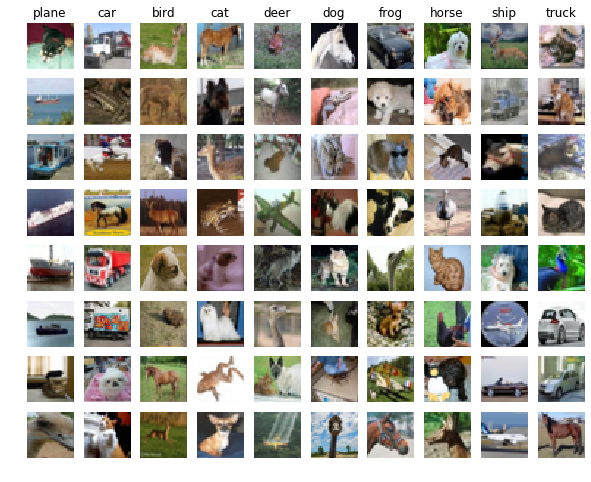

In [0]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

####Q1 Describe the misclassification results? Do they make sense?

Some of the misclassification makes sense. For instance, we have groupings of animals in some classes. The bird classes seem to weight the greenery and background as a strong predictor of that class. 

The HOG is very useful since it provides edges of images. 

"The technique counts occurrences of gradient orientation in localized portions of an image." This provides a low level understanding of an image and tells us alot. Commonly grouped classes have similar localized gradient orientations. 

The "a color histogram is a representation of the distribution of colors in an image."

"HOG features are nothing but a vector of values."

"Similarly, to create RGB histogram from an image, you need to set the number of bins into which the red, green and blue channels are to be divided, by default it is set to 256 if you use 'imhist'."

So essentially we have feature extractors that focus on edges and similar colour distributions which explains why the misclassications are so. 


##Neural Net on Image Features

In [0]:
# Preprocessing: Remove the bias dimension
# Make sure to run this cell only ONCE
print(X_train_feats.shape)
X_train_feats = X_train_feats[:, :-1]
X_val_feats = X_val_feats[:, :-1]
X_test_feats = X_test_feats[:, :-1]

print(X_train_feats.shape)

(49000, 155)
(49000, 154)


##Change This

In [0]:
input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

#net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None
best_val = -1

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
def generate_random_hyperparams(lr_min, lr_max, reg_min, reg_max, h_min, h_max):
    lr = 10**np.random.uniform(lr_min,lr_max)
    reg = 10**np.random.uniform(reg_min,reg_max)
    hidden = np.random.randint(h_min, h_max)
    return lr, reg, hidden

# Use of random search for hyperparameter search
for i in range(20):
    lr, reg, hidden_dim = generate_random_hyperparams(-1, 0, -7, -4, 10, 500)
    # Create a two-layer network
    net = TwoLayerNet(input_dim, hidden_dim, num_classes)
    
    # Train the network
    stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
                num_iters=3000, batch_size=200,
                learning_rate=lr, learning_rate_decay=0.95,
                reg=reg, verbose=False)

    # Predict on the training set
    train_accuracy = (net.predict(X_train_feats) == y_train).mean()
    
    # Predict on the validation set
    val_accuracy = (net.predict(X_val_feats) == y_val).mean()
    
    # Save best values
    if val_accuracy > best_val:
        best_val = val_accuracy
        best_net = net
    
    # Print results
    print('lr %e reg %e hid %d  train accuracy: %f val accuracy: %f' % (
                lr, reg, hidden_dim, train_accuracy, val_accuracy))
print('best validation accuracy achieved: %f' % best_val)
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

lr 2.109679e-01 reg 8.077828e-07 hid 421  train accuracy: 0.678327 val accuracy: 0.610000
lr 1.720805e-01 reg 2.012668e-06 hid 365  train accuracy: 0.648776 val accuracy: 0.588000
lr 7.815075e-01 reg 6.247009e-06 hid 367  train accuracy: 0.803878 val accuracy: 0.564000
lr 1.069803e-01 reg 3.105301e-06 hid 394  train accuracy: 0.592857 val accuracy: 0.560000
lr 2.675065e-01 reg 2.214233e-05 hid 208  train accuracy: 0.682551 val accuracy: 0.587000
lr 1.016180e-01 reg 1.243488e-06 hid 287  train accuracy: 0.585204 val accuracy: 0.553000
lr 1.852812e-01 reg 4.302932e-05 hid 113  train accuracy: 0.631061 val accuracy: 0.587000
lr 3.344277e-01 reg 1.305914e-07 hid 12  train accuracy: 0.536592 val accuracy: 0.515000
lr 9.276236e-01 reg 2.598874e-05 hid 238  train accuracy: 0.763653 val accuracy: 0.580000
lr 1.770883e-01 reg 1.426869e-07 hid 494  train accuracy: 0.659102 val accuracy: 0.586000
lr 1.017634e-01 reg 6.651549e-06 hid 420  train accuracy: 0.591633 val accuracy: 0.561000
lr 4.618524

In [0]:
# Run your best neural net classifier on the test set. You should be able
# to get more than 55% accuracy.
test_acc = (best_net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.586
